In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import Minuit

In [5]:
df_ac = pd.read_csv('D:/acceptance_mc.csv')
df_td = pd.read_csv('D:/total_dataset.csv')
df_sg = pd.read_csv('D:/signal.csv')

In [6]:
bins = []
def bin_q2(dataframe,edges):
    for i in range(len(edges)):
        df1 = dataframe[dataframe['q2']<edges[i][1]]
        df1 = df1[df1['q2']>edges[i][0]]
        bins.append(df1)
    
            
bin_q2(df_ac, [[0.1,0.98], [1.1,2.5], [2.5,4.0], [4.0,6.0], [6.0,8.0], [15.0,17.0], [17.0,19.0], [11.0,12.5], [1.0,6.0], [15.0,17.9]])

In [12]:
def d2gamma_p_d2q2_dcostheta(fl, afb, S3, S4, S5, S7, S8, S9, cos_theta_l, cos_theta_k, phi):
    
    ctl = cos_theta_l #costhetal
    stl2 = 1 - ctl ** 2 #sinthetal squared
    stl = np.sqrt(stl2) #sinthetal
    s2tl = 2 * ctl * np.sqrt(stl2) #sin2thetal
    c2tl = 2 * ctl ** 2 - 1 #cos2thetal
    ctk = cos_theta_k #costhetak
    ctk2 = ctk ** 2 #costhetak squared
    stk2 = 1 - ctk ** 2 #sinthetak squared
    s2tk = 2 * ctk * np.sqrt(stk2) #sin2thetak
    stk = np.sqrt(stk2) #sinthetak
    phi = phi #phi
    cp = np.cos(phi) #cosphi
    sp = np.sin(phi) #sinphi
    c2p = 2 * cp ** 2 - 1 #cos2phi
    s2p = 2 * cp * sp #sin2phi
    #acceptance = 0.5  # acceptance "function"
    scalar_array = 9/(32*np.pi) * ((3/4)*(1-fl)*stk2 +fl*ctk2 + 1/4*(1-fl)*stk2*c2tl - fl*ctk2*c2tl + S3*stk2*stl2*c2p + S4*s2tk*s2tl*cp + S5*s2tk*stl*cp + (4/3)*afb*stk2*ctl + S7*stk2*stl*sp + S8*s2tk*s2tl*sp + S9*stk2*stl2*s2p) #* acceptance
    normalised_scalar_array = scalar_array #* 2  # normalising scalar array to account for the non-unity acceptance function
    return normalised_scalar_array

def log_likelihood(fl, afb, S3, S4, S5, S7, S8, S9, _bin):
    """
    Returns the negative log-likelihood of the pdf defined above
    :param fl: f_l observable
    :param afb: a_fb observable
    :param _bin: number of the bin to fit
    :return:
    """
    _bin = bins[int(_bin)]
    ctl = _bin['costhetal']
    ctk = _bin['costhetak']
    phi = _bin['phi']
    normalised_scalar_array = d2gamma_p_d2q2_dcostheta(fl=fl, afb=afb, S3=S3, S4=S4, S5=S5, S7=S7, S8=S8, S9=S9, cos_theta_l=ctl, cos_theta_k=ctk, phi=phi)
    return - np.sum(np.log(normalised_scalar_array))

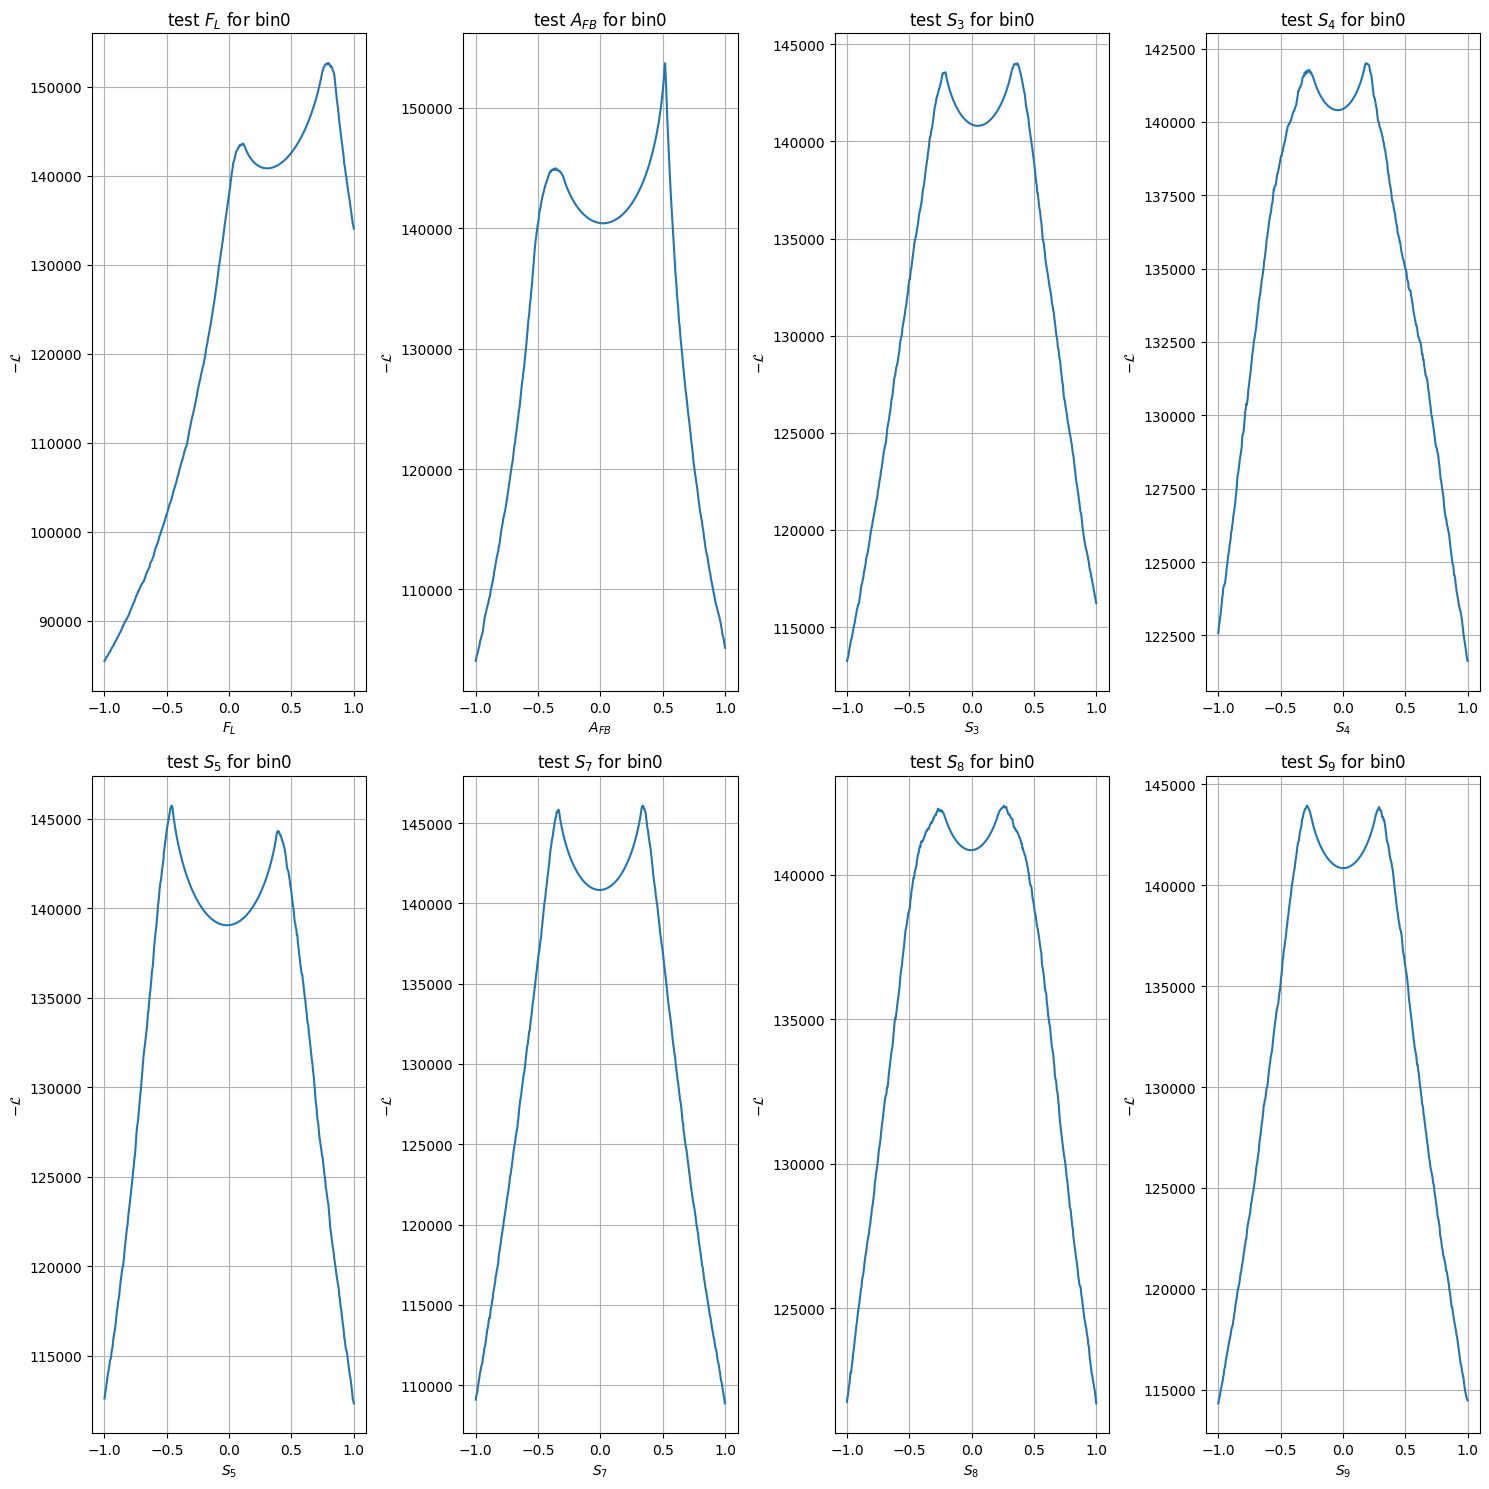

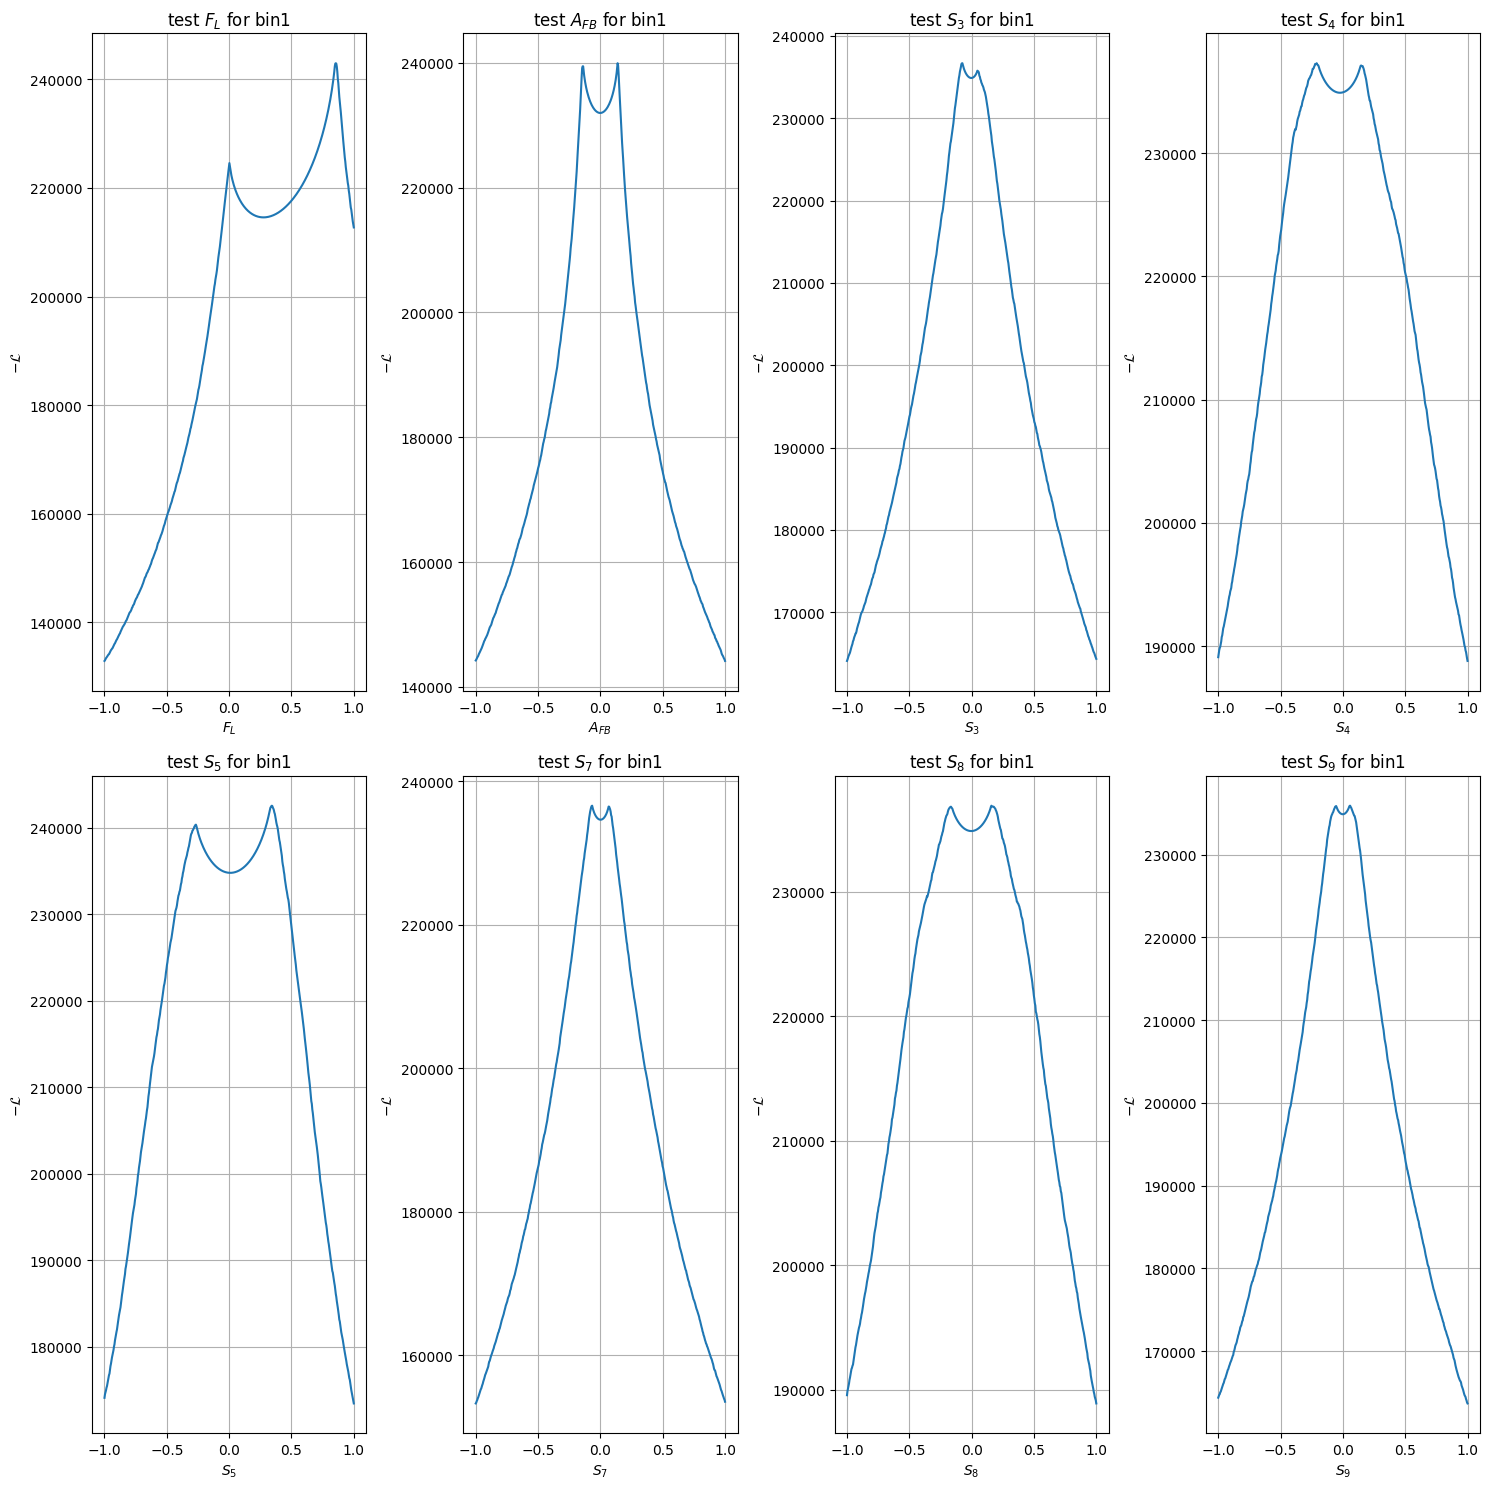

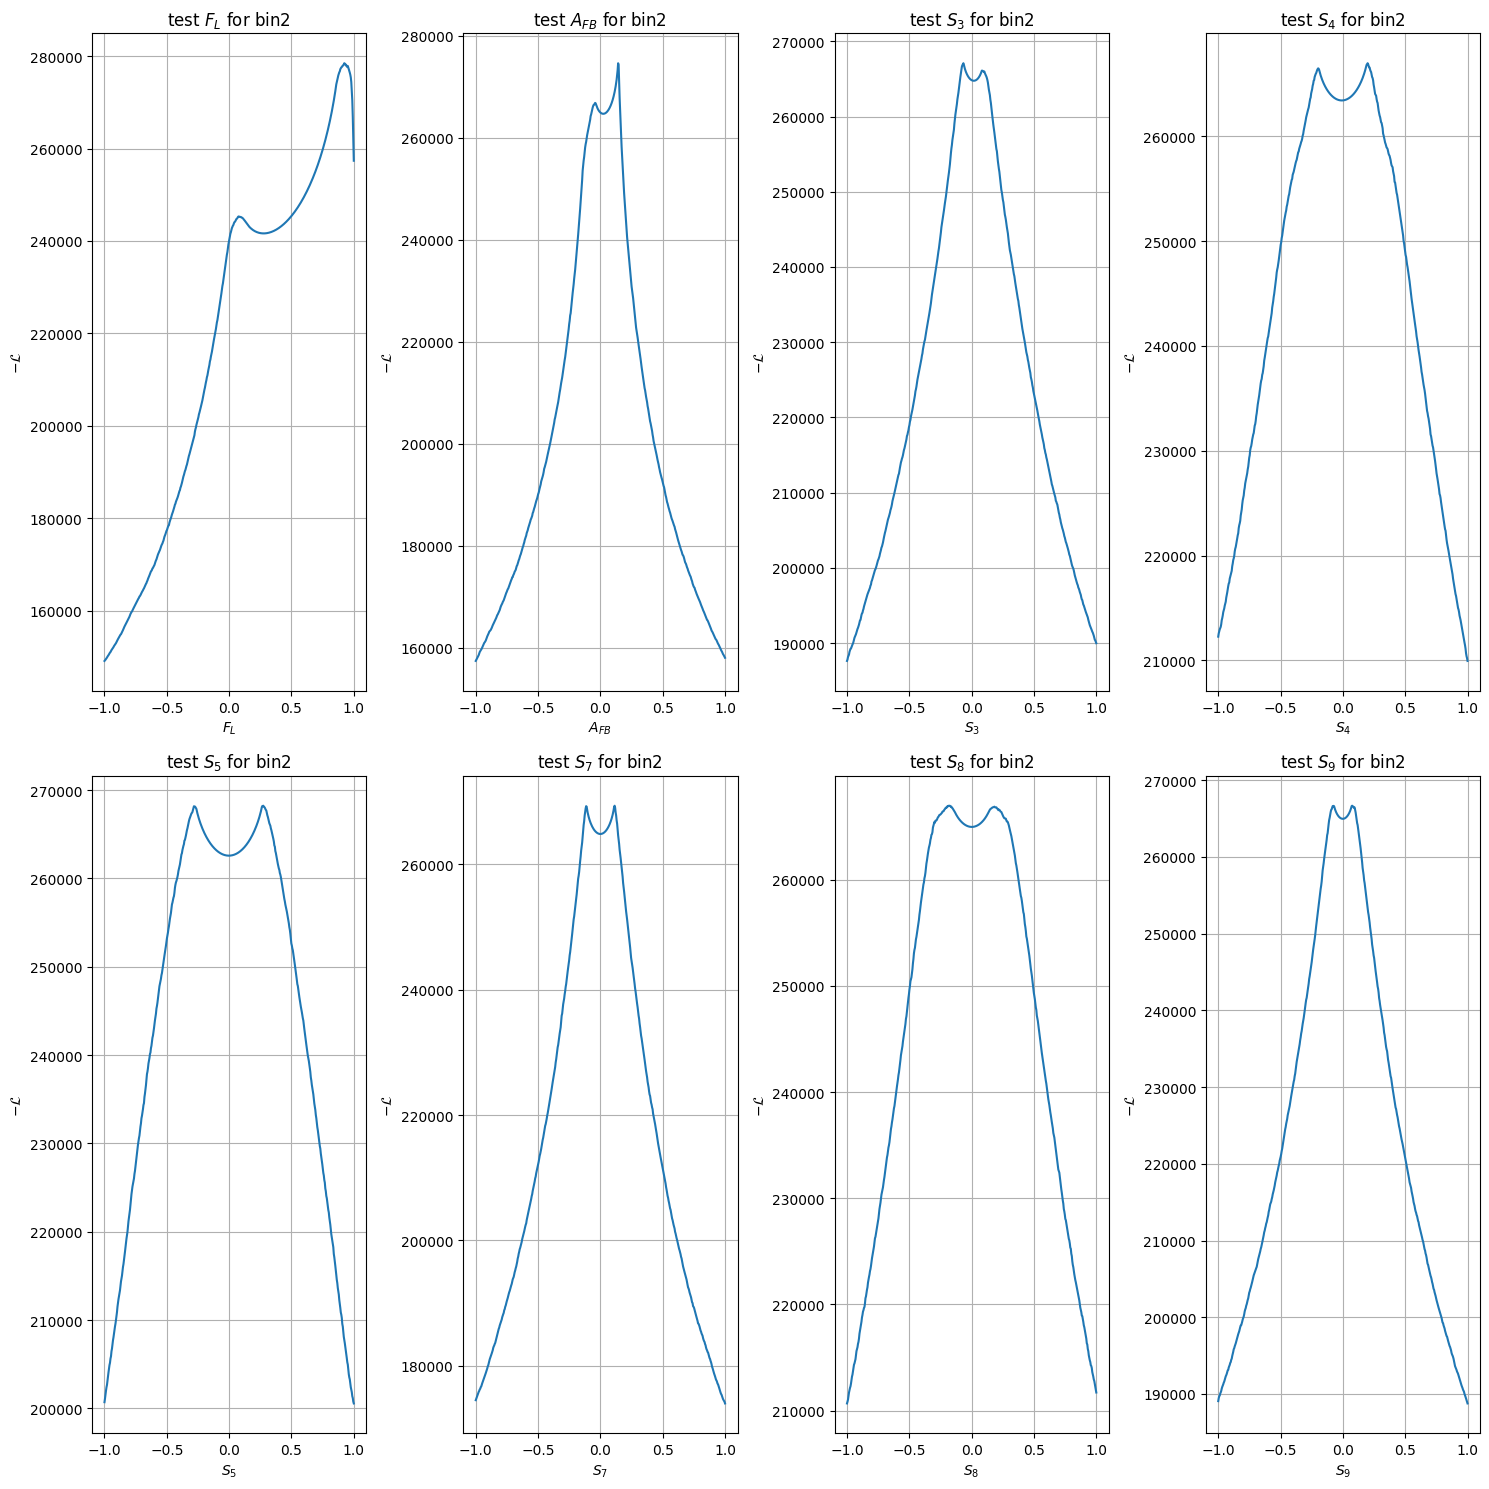

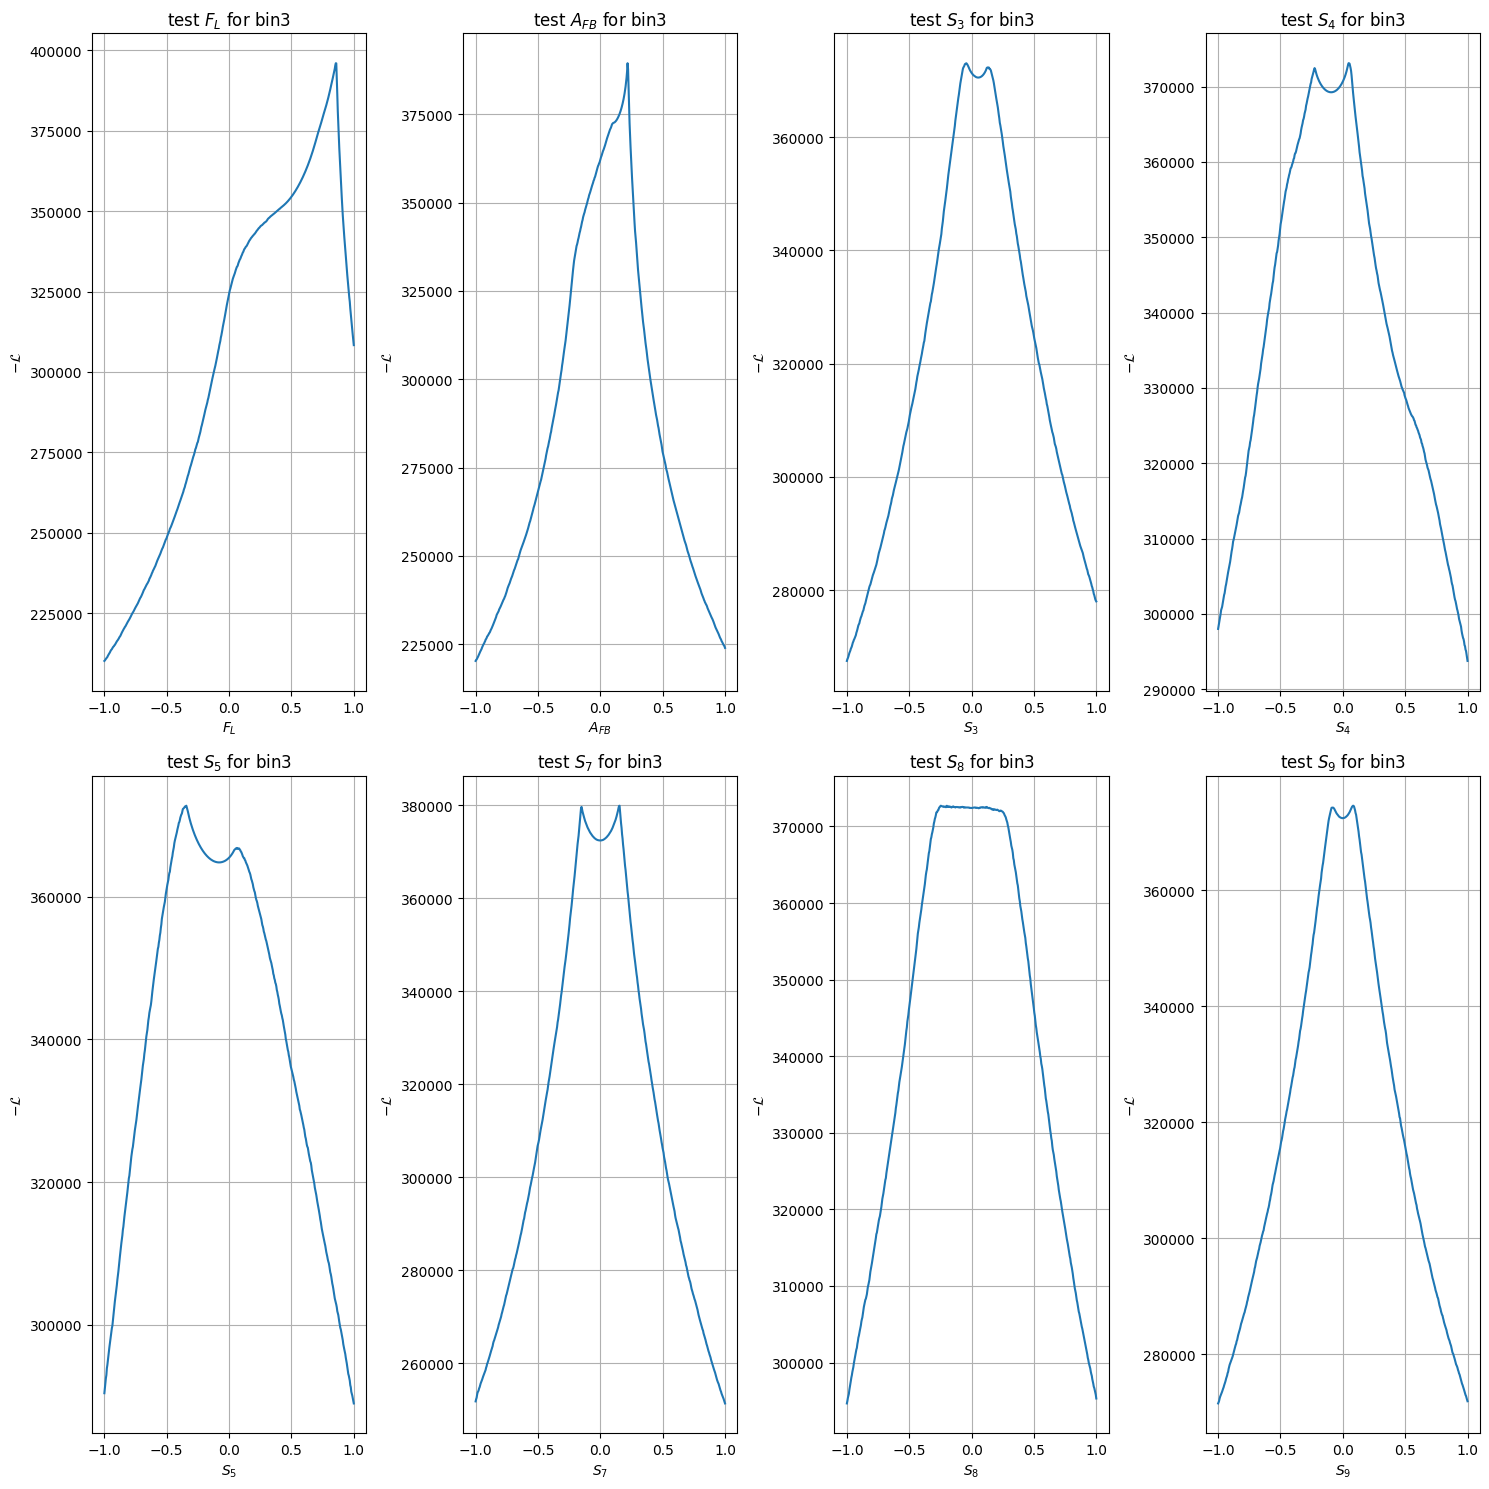

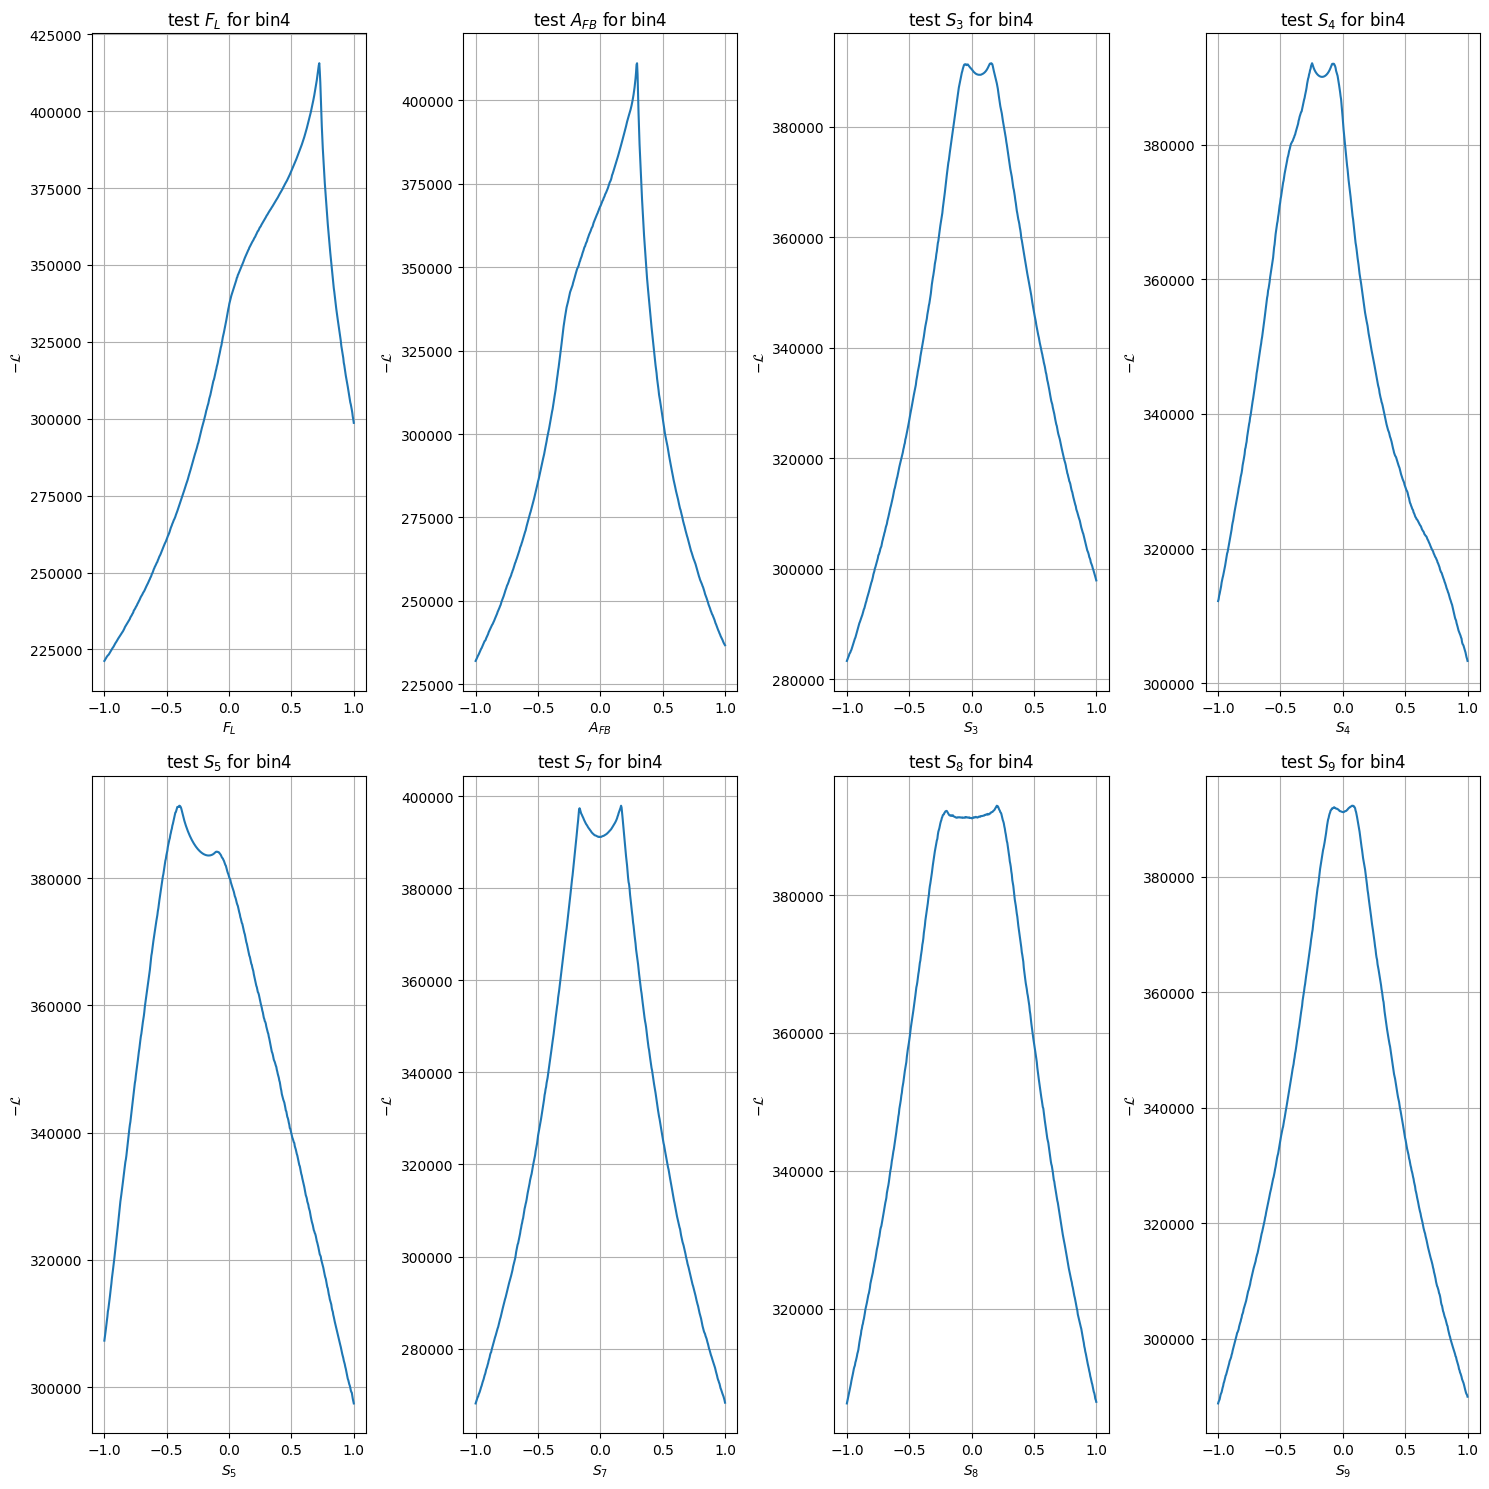

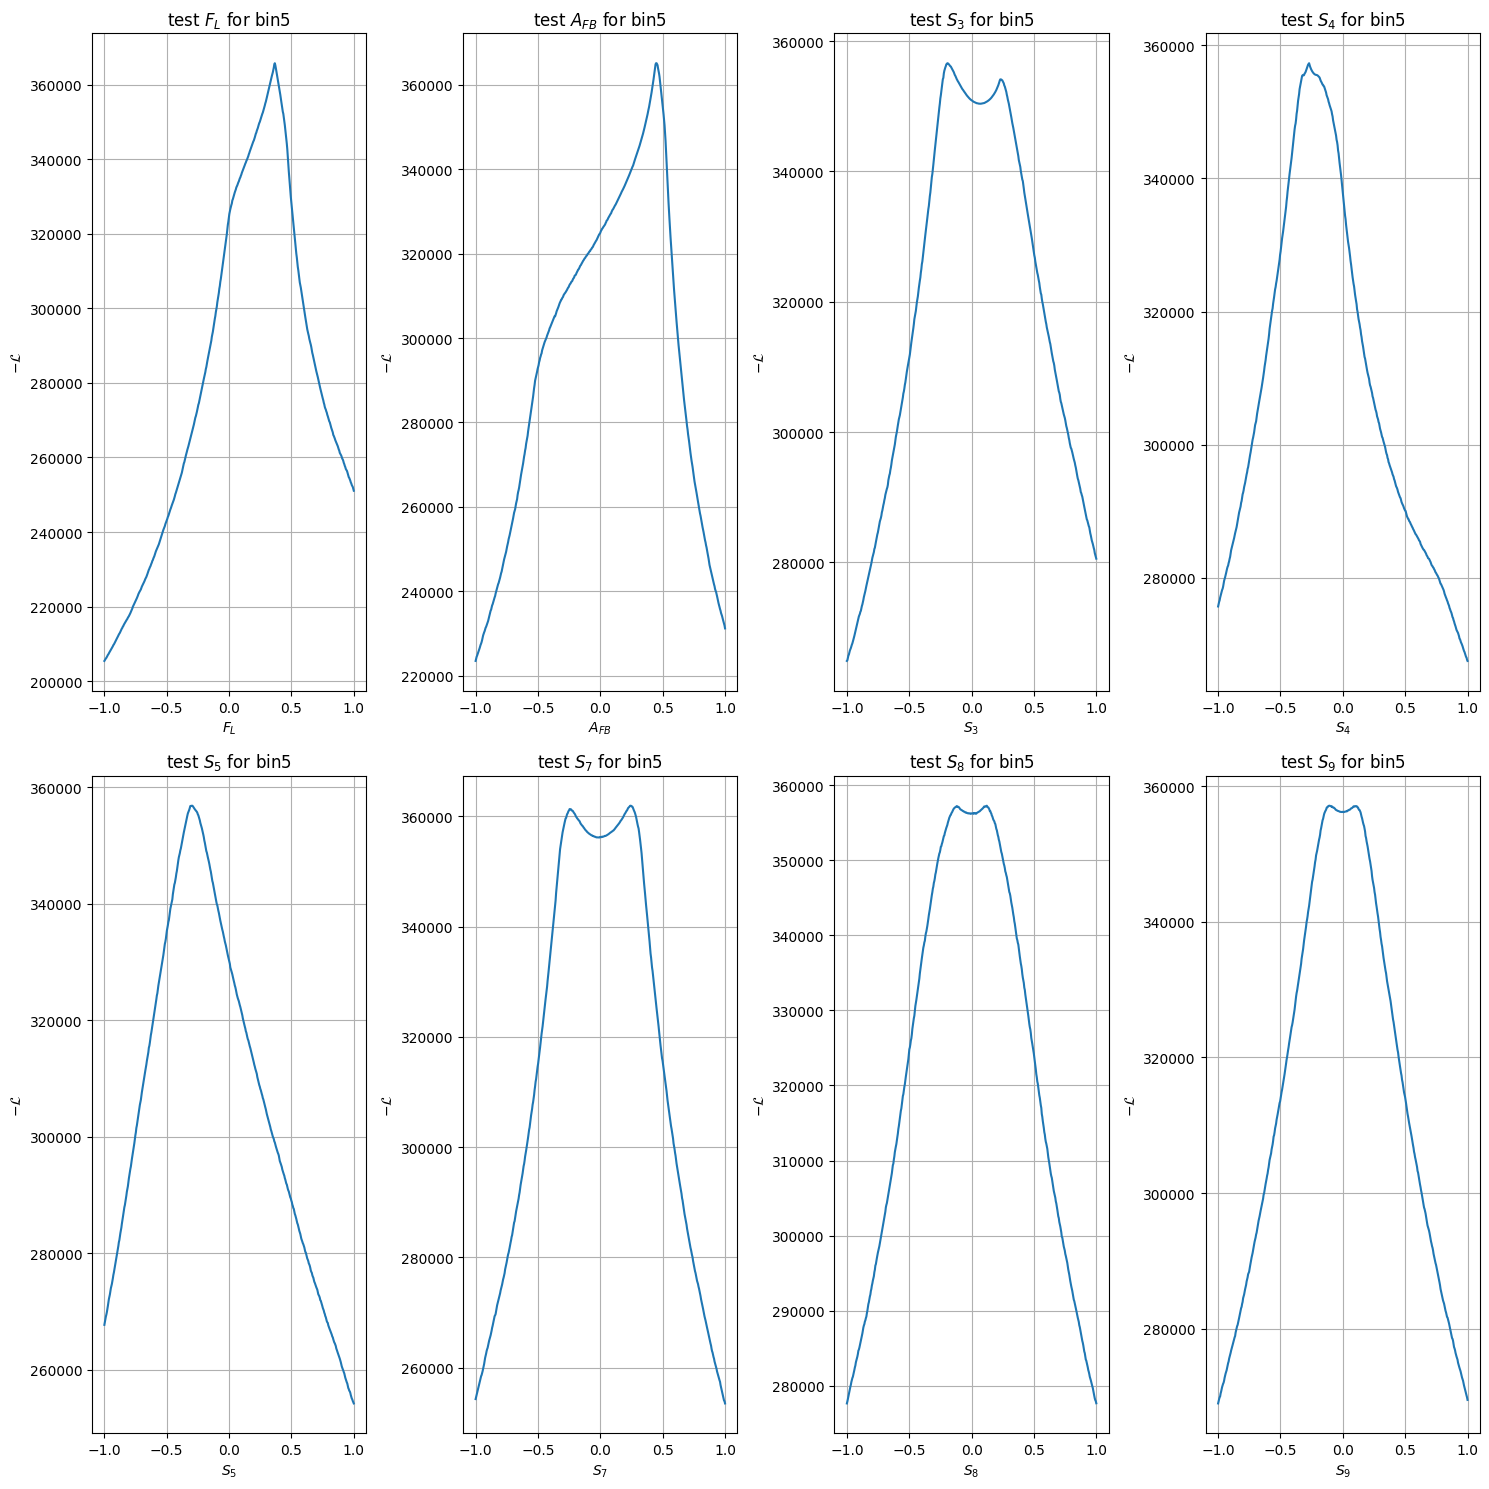

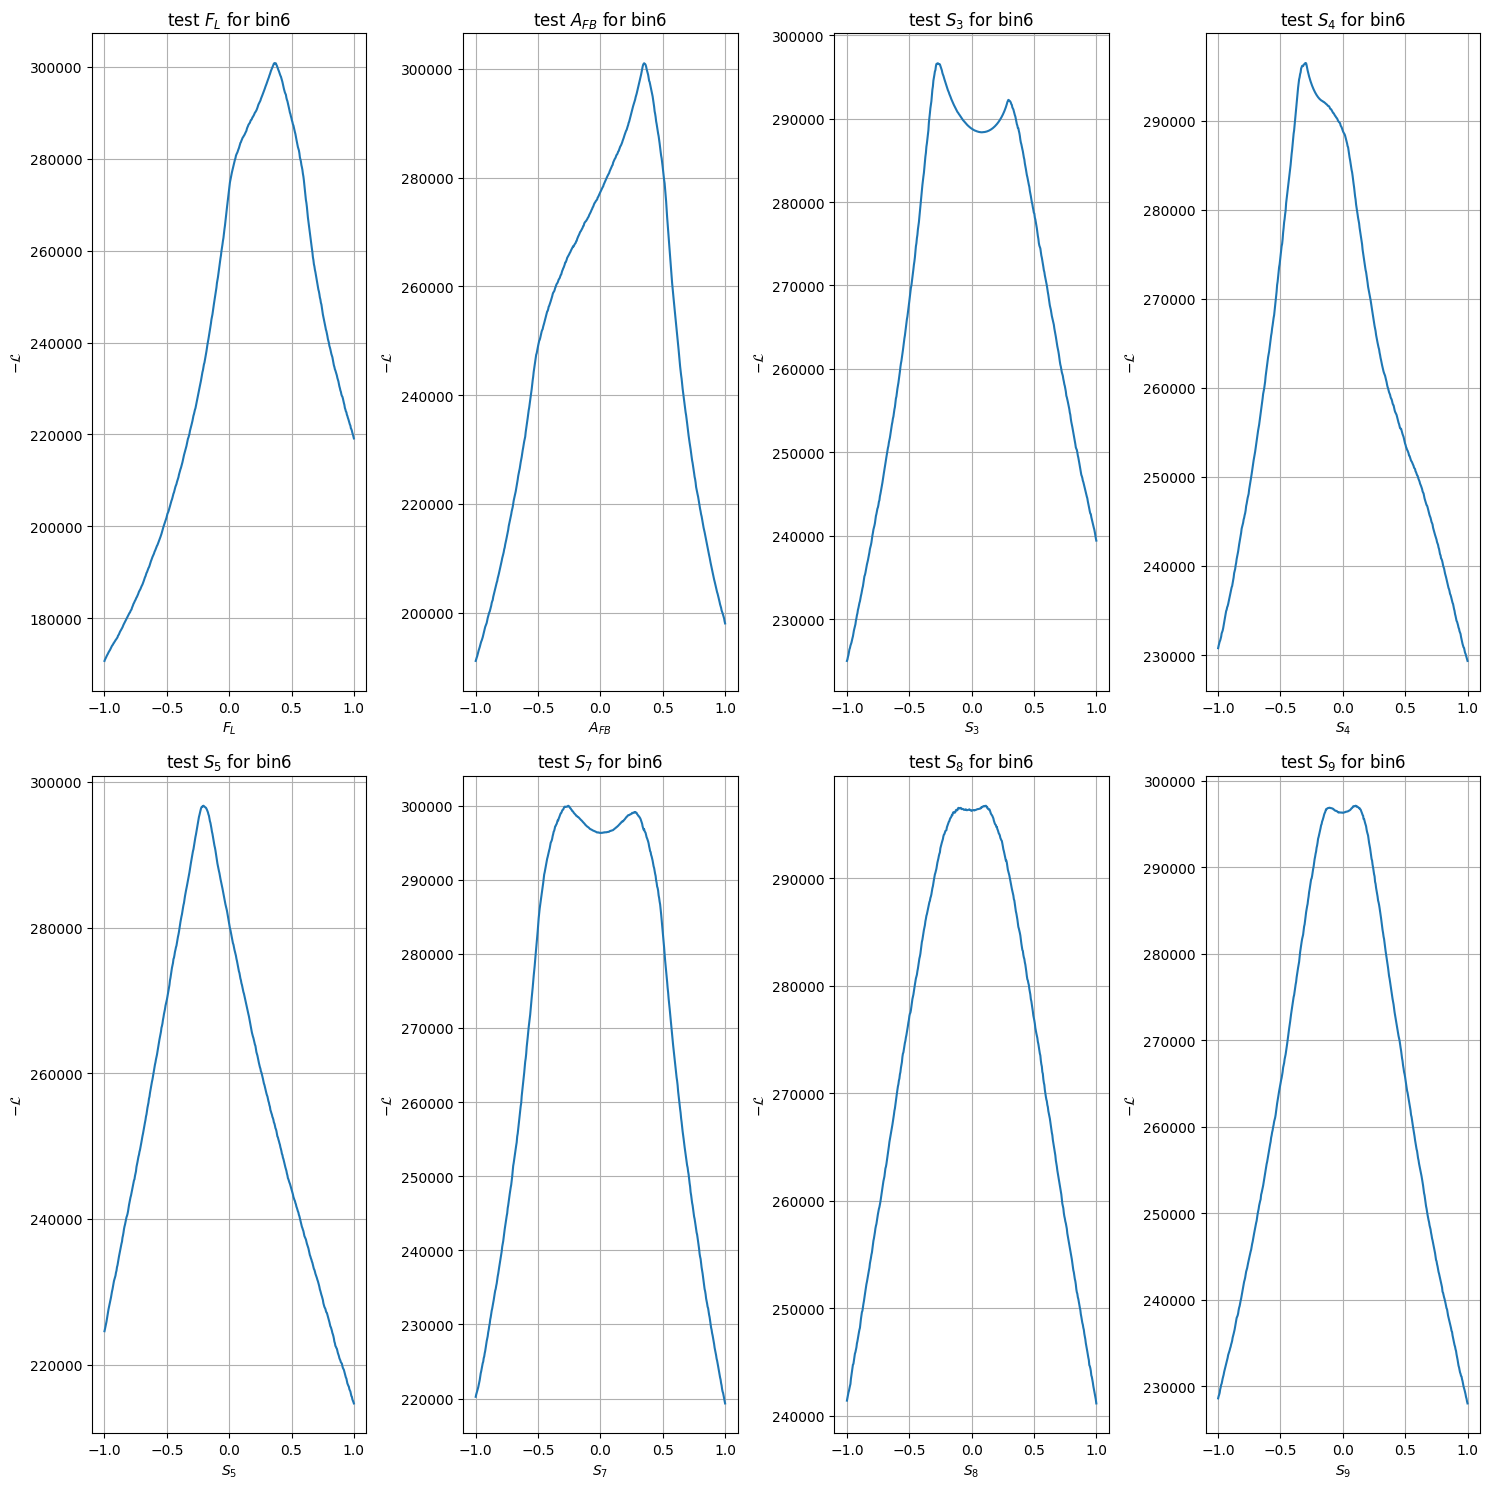

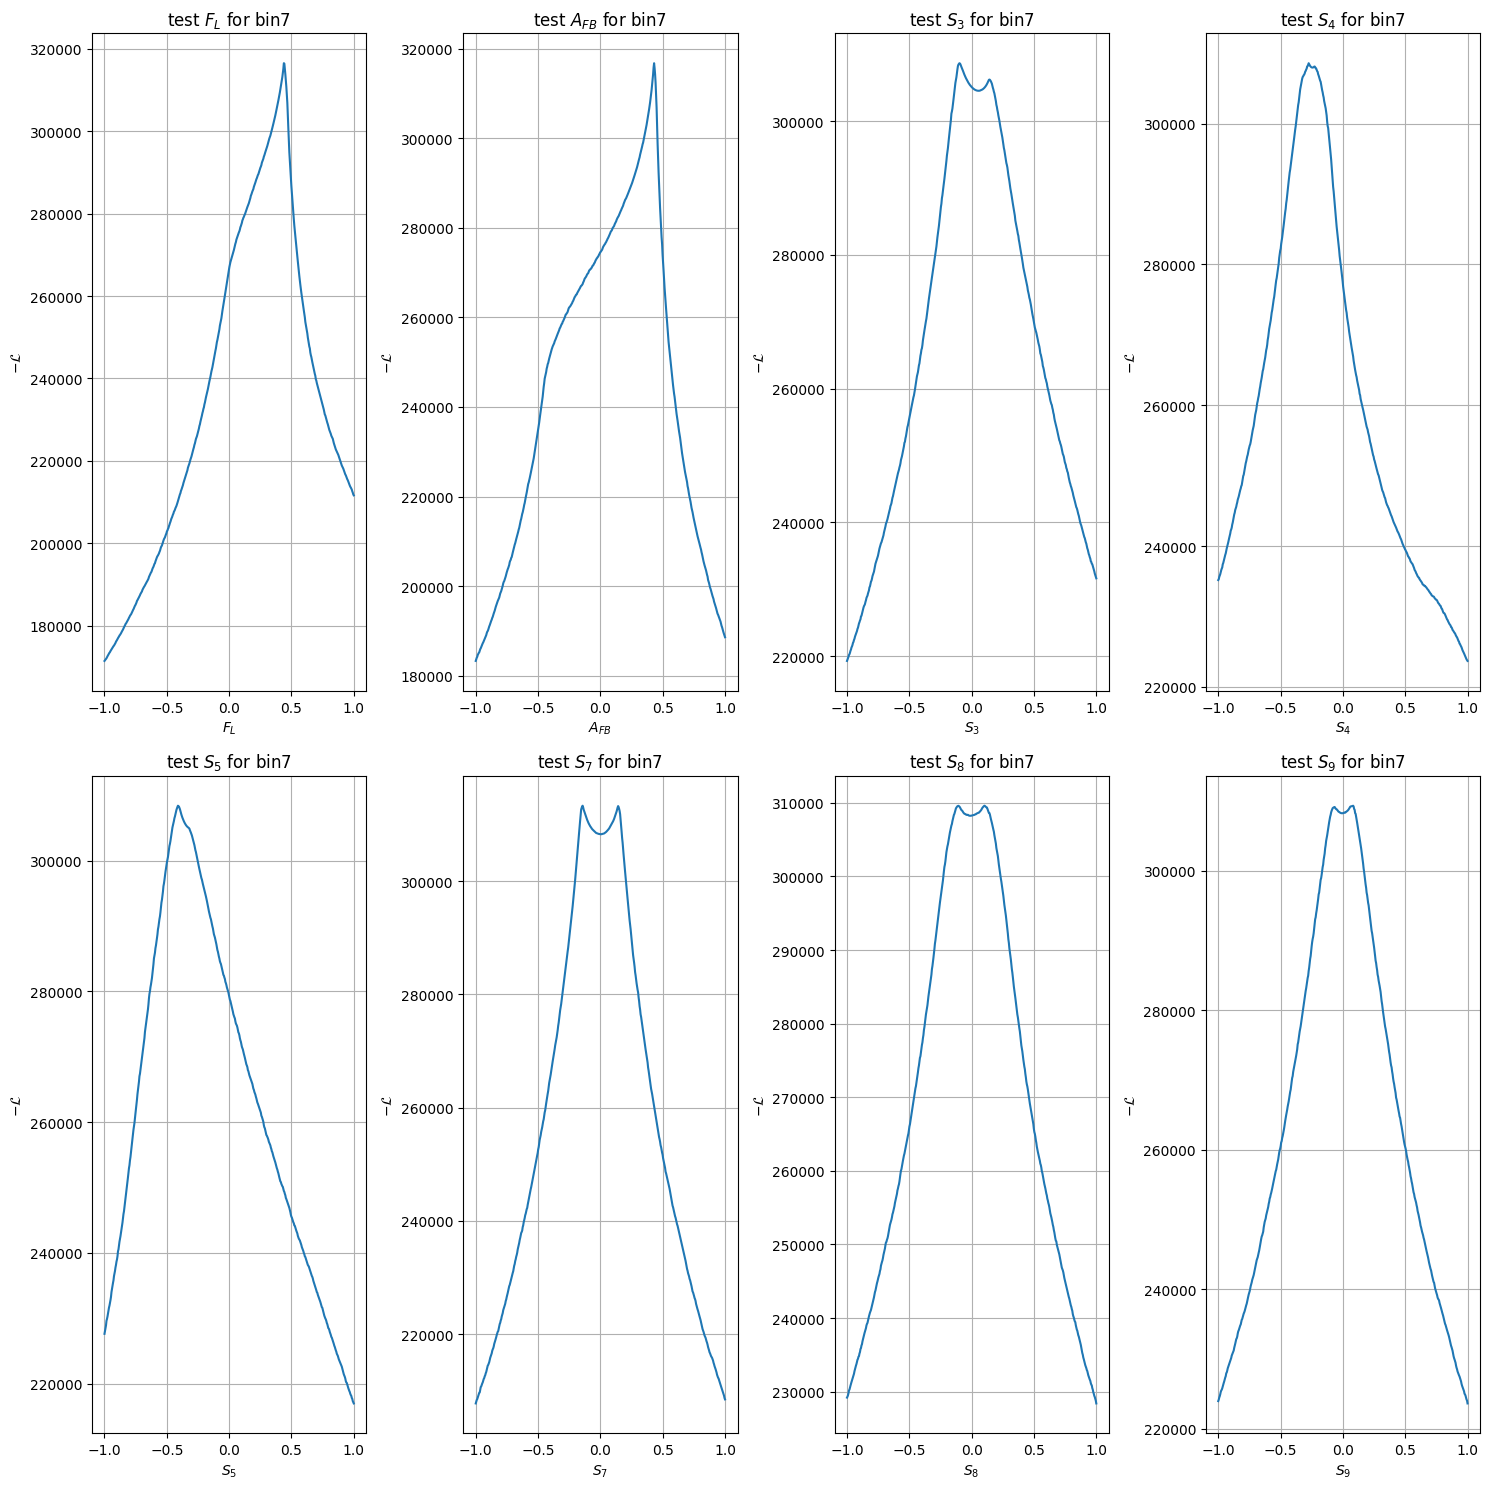

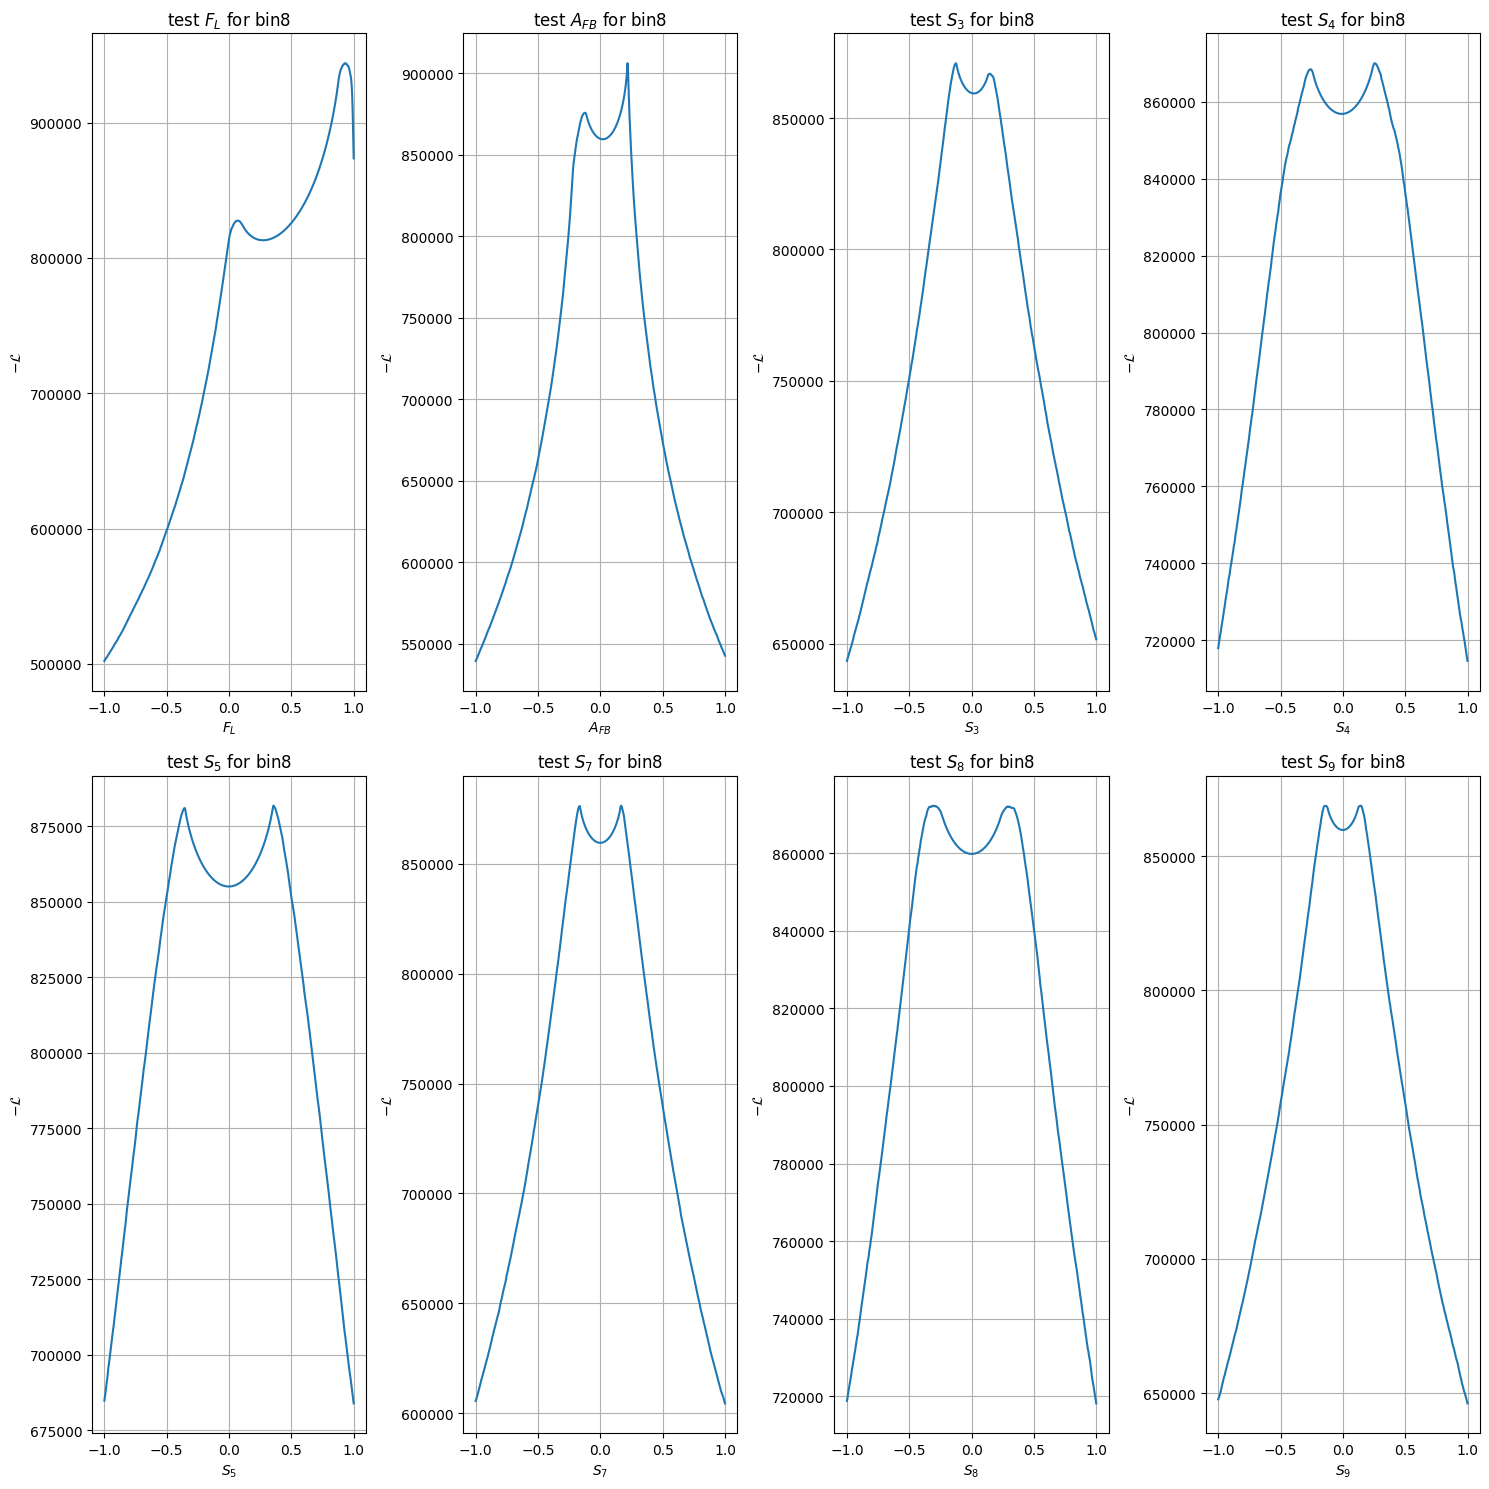

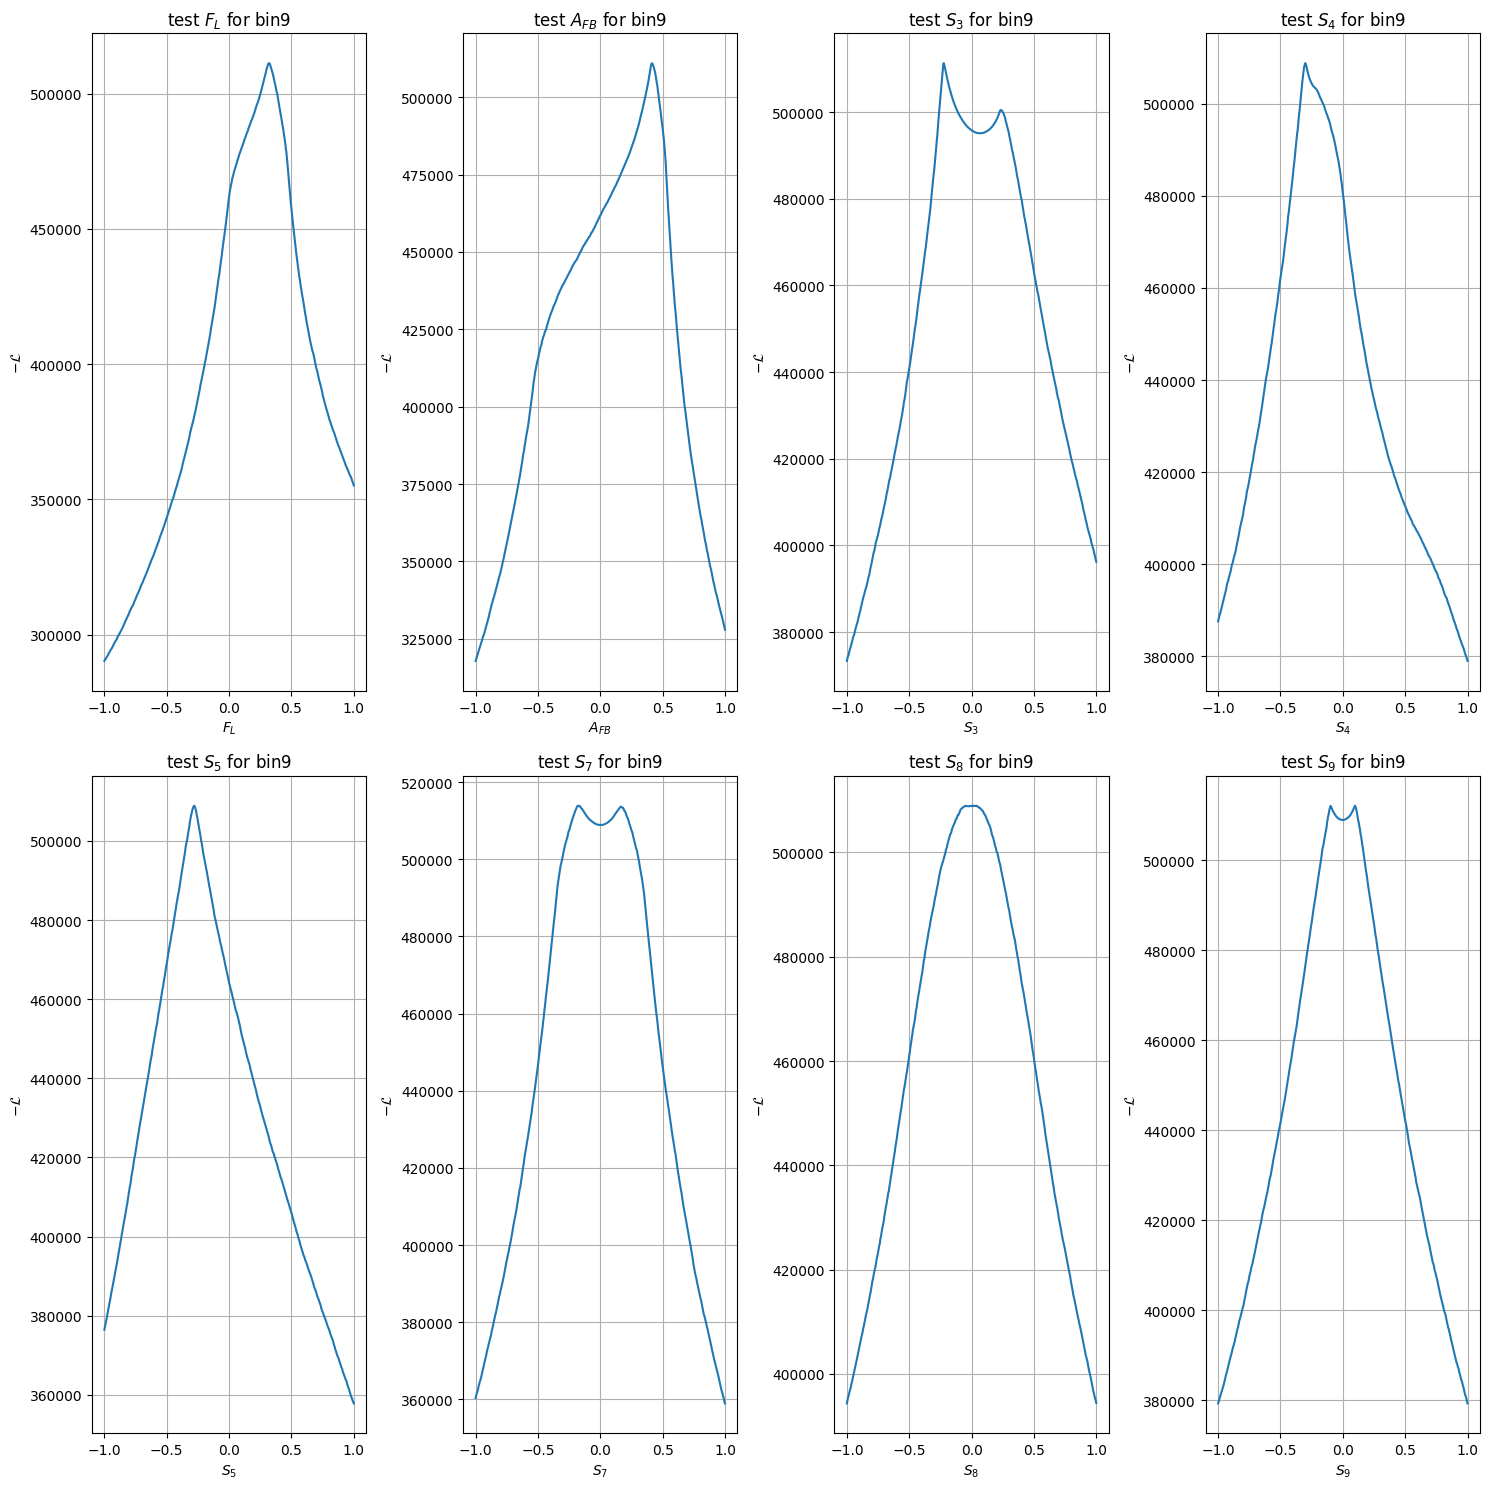

In [21]:
_test_bin = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
_test_afb = [-0.1, -0.1, 0.0, 0.1, 0.2, 0.4, 0.3, 0.4, 0.0, 0.4]
_test_fl = [0.3, 0.8, 0.8, 0.7, 0.6, 0.3, 0.3, 0.4, 0.7, 0.3]
_test_S3 = [0.01, 0.0023, -0.0108, -0.0247, -0.0397, -0.173, -0.251, -0.085, -0.0126, -0.204]
_test_S4 = [0.09, -0.025, -0.1516, -0.2242, -0.2596, -0.294, -0.310, -0.281, -0.1428, -0.300]
_test_S5 = [0.25, 0.0545, -0.1930, -0.3371, -0.4035, -0.318, -0.226, -0.406, -0.1766, -0.280]
_test_S7 = [-0.02, -0.027, -0.0199, -0.0133, -0.0087, -0.001, -0.000, -0.002, -0.0193, -0.001]
_test_S8 = [-0.002, -0.006, -0.0065, -0.0050, -0.0036, 0.0003, 0.0001, 0.0010, -0.0060, 0.0002]
_test_S9 = [-0.007, -0.0007, -0.0007, -0.0007, -0.0007, 0.0002, 0.0001, 0.0004, -0.0007, 0.0002]
for j in range(len(_test_bin)):
    x = np.linspace(-1, 1, 500)
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15, 15))
    ax1.plot(x, [log_likelihood(fl=i, afb=_test_afb[j], S3 = _test_S3[j], S4 = _test_S4[j], S5 = _test_S5[j], S7 = _test_S7[j], S8 = _test_S8[j], S9 = _test_S9[j], _bin = _test_bin[j]) for i in x])
    ax1.set_title(r'test $F_L$ for bin' + str(_test_bin[j]))
    ax1.set_xlabel(r'$F_L$')
    ax1.set_ylabel(r'$-\mathcal{L}$')
    ax1.grid()
    ax2.plot(x, [log_likelihood(fl=_test_fl[j], afb=i,S3 = _test_S3[j], S4 = _test_S4[j], S5 = _test_S5[j], S7 = _test_S7[j], S8 = _test_S8[j], S9 = _test_S9[j], _bin = _test_bin[j]) for i in x])
    ax2.set_title(r'test $A_{FB}$ for bin' + str(_test_bin[j]))
    ax2.set_xlabel(r'$A_{FB}$')
    ax2.set_ylabel(r'$-\mathcal{L}$')
    ax2.grid()
    ax3.plot(x, [log_likelihood(fl=_test_fl[j], afb=_test_afb[j],S3 = i, S4 = _test_S4[j], S5 = _test_S5[j], S7 = _test_S7[j], S8 = _test_S8[j], S9 = _test_S9[j], _bin = _test_bin[j]) for i in x])
    ax3.set_title(r'test $S_{3}$ for bin' + str(_test_bin[j]))
    ax3.set_xlabel(r'$S_{3}$')
    ax3.set_ylabel(r'$-\mathcal{L}$')
    ax3.grid()
    ax4.plot(x, [log_likelihood(fl=_test_fl[j], afb=_test_afb[j],S3 = _test_S3[j], S4 = i, S5 = _test_S5[j], S7 = _test_S7[j], S8 = _test_S8[j], S9 = _test_S9[j], _bin = _test_bin[j]) for i in x])
    ax4.set_title(r'test $S_{4}$ for bin' + str(_test_bin[j]))
    ax4.set_xlabel(r'$S_{4}$')
    ax4.set_ylabel(r'$-\mathcal{L}$')
    ax4.grid()
    ax5.plot(x, [log_likelihood(fl=_test_fl[j], afb=_test_afb[j],S3 = _test_S3[j], S4 = _test_S4[j], S5 = i, S7 = _test_S7[j], S8 = _test_S8[j], S9 = _test_S9[j], _bin = _test_bin[j]) for i in x])
    ax5.set_title(r'test $S_{5}$ for bin' + str(_test_bin[j]))
    ax5.set_xlabel(r'$S_{5}$')
    ax5.set_ylabel(r'$-\mathcal{L}$')
    ax5.grid()
    ax6.plot(x, [log_likelihood(fl=_test_fl[j], afb=_test_afb[j],S3 = _test_S3[j], S4 = _test_S4[j], S5 = _test_S5[j], S7 = i, S8 = _test_S8[j], S9 = _test_S9[j], _bin = _test_bin[j]) for i in x])
    ax6.set_title(r'test $S_{7}$ for bin' + str(_test_bin[j]))
    ax6.set_xlabel(r'$S_{7}$')
    ax6.set_ylabel(r'$-\mathcal{L}$')
    ax6.grid()
    ax7.plot(x, [log_likelihood(fl=_test_fl[j], afb=_test_afb[j],S3 = _test_S3[j], S4 = _test_S4[j], S5 = _test_S5[j], S7 = _test_S7[j], S8 = i, S9 = _test_S9[j], _bin = _test_bin[j]) for i in x])
    ax7.set_title(r'test $S_{8}$ for bin' + str(_test_bin[j]))
    ax7.set_xlabel(r'$S_{8}$')
    ax7.set_ylabel(r'$-\mathcal{L}$')
    ax7.grid()
    ax8.plot(x, [log_likelihood(fl=_test_fl[j], afb=_test_afb[j],S3 = _test_S3[j], S4 = _test_S4[j], S5 = _test_S5[j], S7 = _test_S7[j], S8 = _test_S8[j], S9 =i, _bin = _test_bin[j]) for i in x])
    ax8.set_title(r'test $S_{9}$ for bin' + str(_test_bin[j]))
    ax8.set_xlabel(r'$S_{9}$')
    ax8.set_ylabel(r'$-\mathcal{L}$')
    ax8.grid()
    plt.tight_layout()
    plt.show()

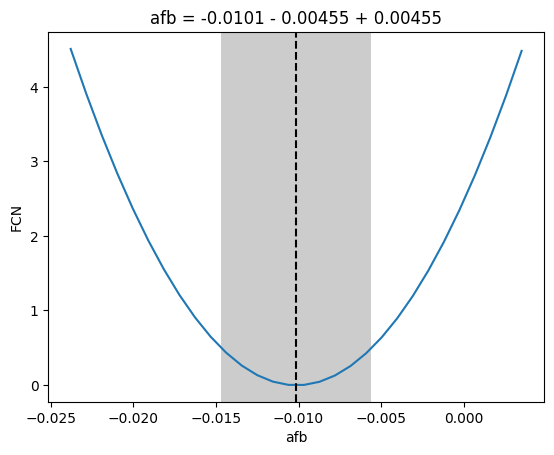

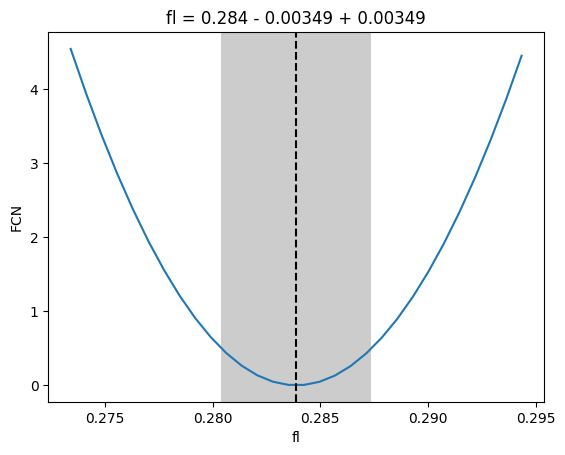

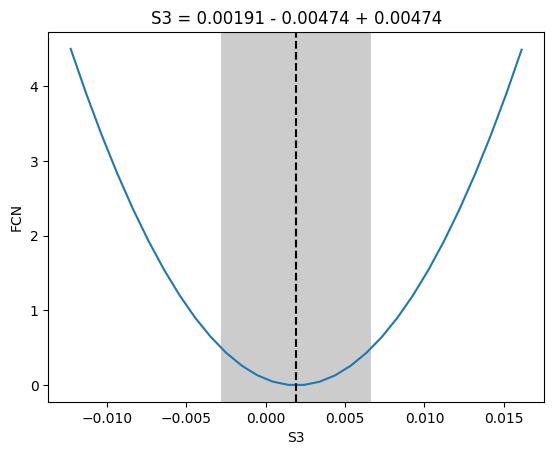

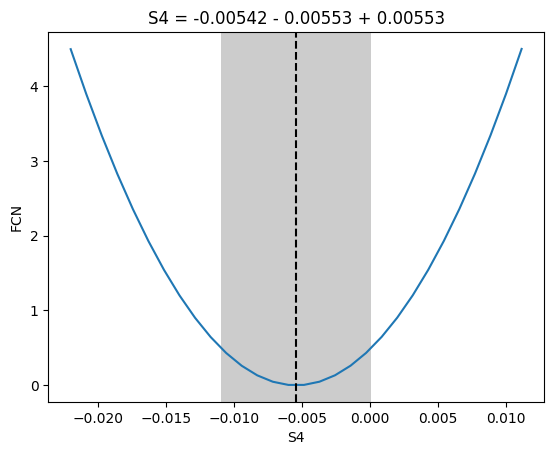

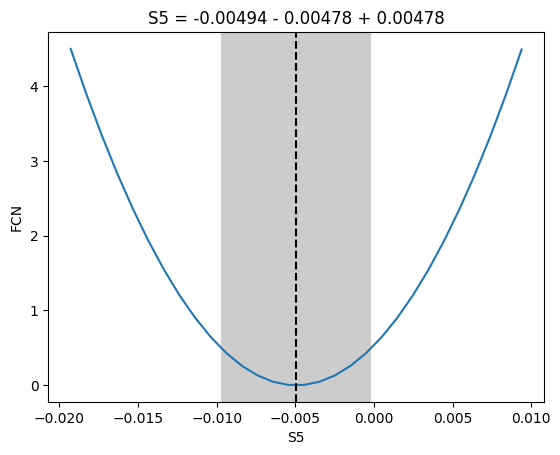

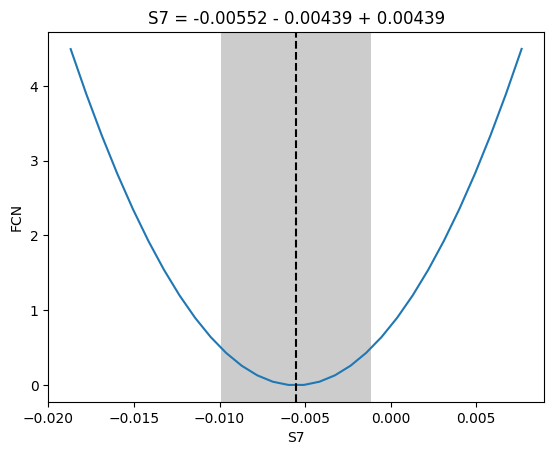

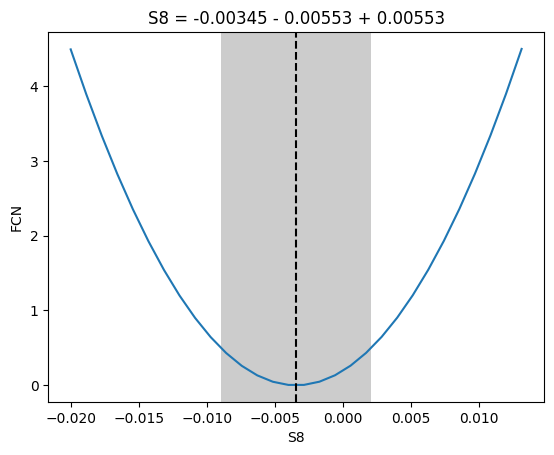

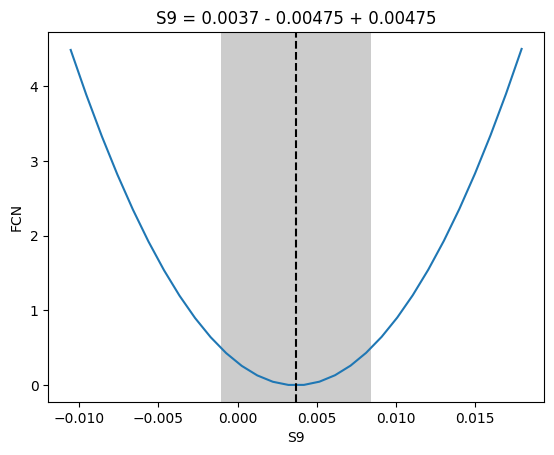

Bin 0: 0.284 pm 0.003, -0.01 pm 0.005, 0.002 pm 0.005, -0.005 pm 0.006, -0.005 pm 0.005, -0.006 pm 0.004, -0.003 pm 0.006, 0.004 pm 0.005, Fuction minimum considered valid: True


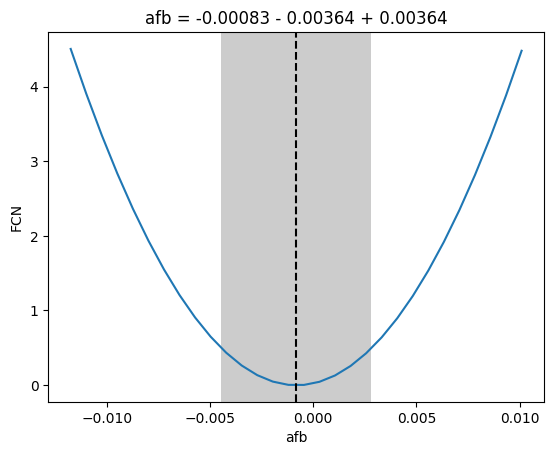

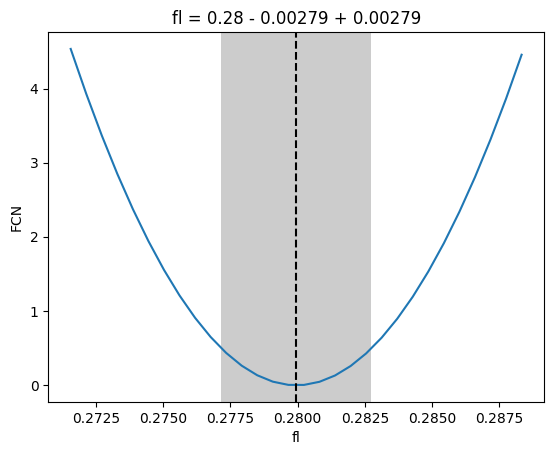

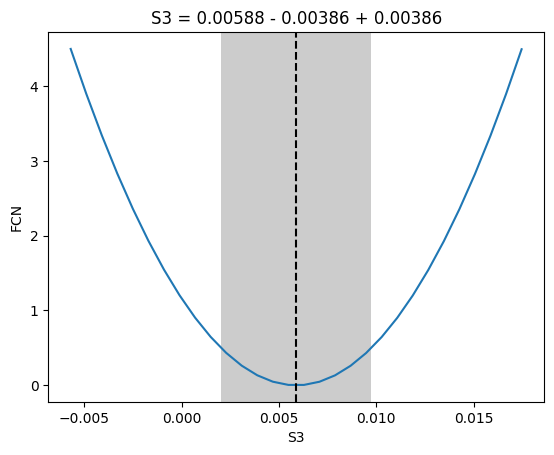

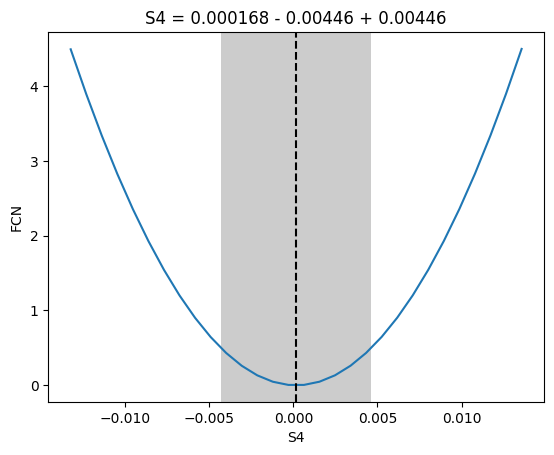

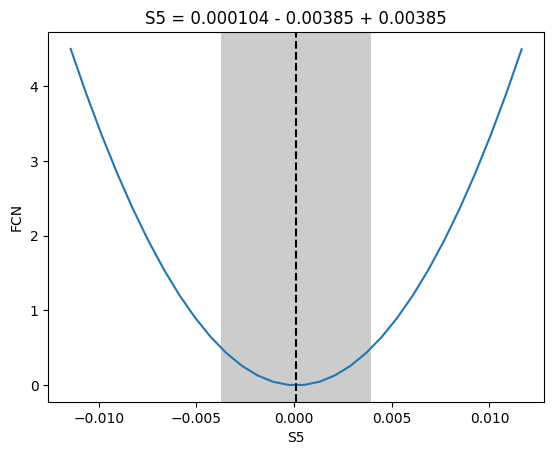

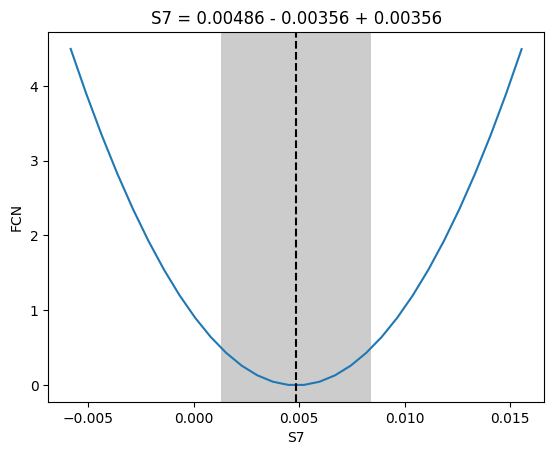

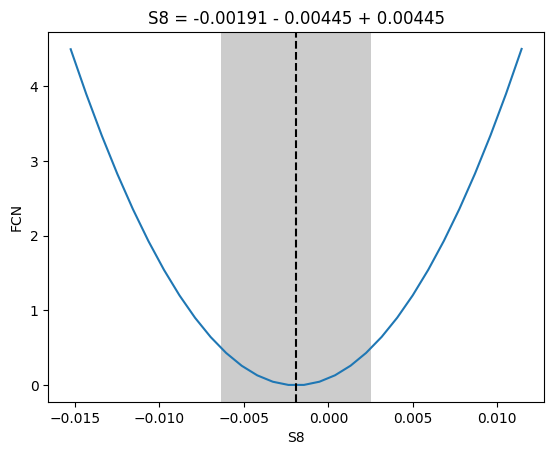

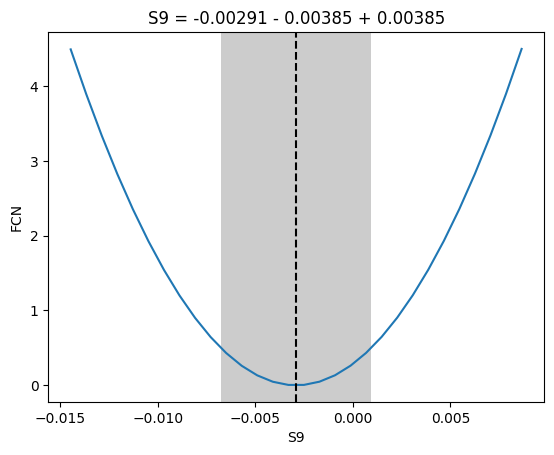

Bin 1: 0.28 pm 0.003, -0.001 pm 0.004, 0.006 pm 0.004, 0.0 pm 0.004, 0.0 pm 0.004, 0.005 pm 0.004, -0.002 pm 0.004, -0.003 pm 0.004, Fuction minimum considered valid: True


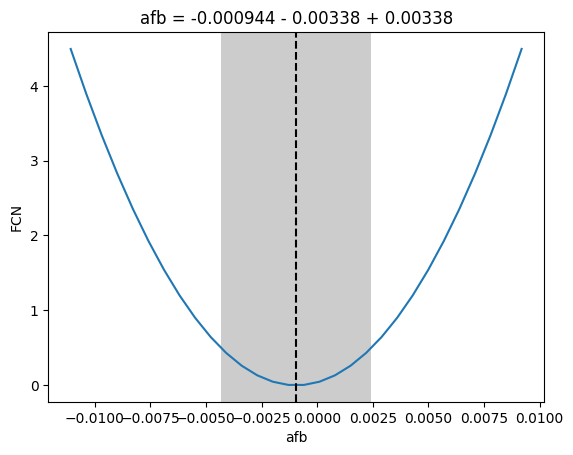

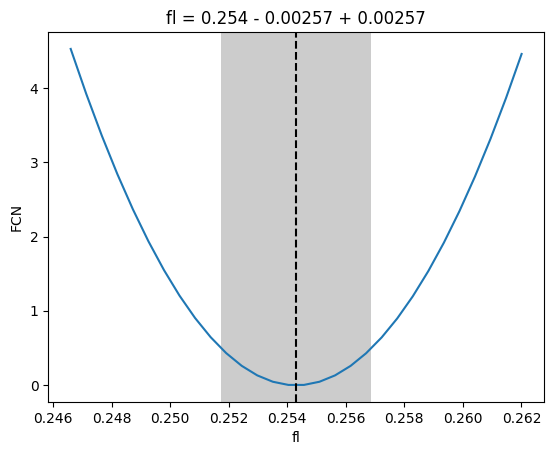

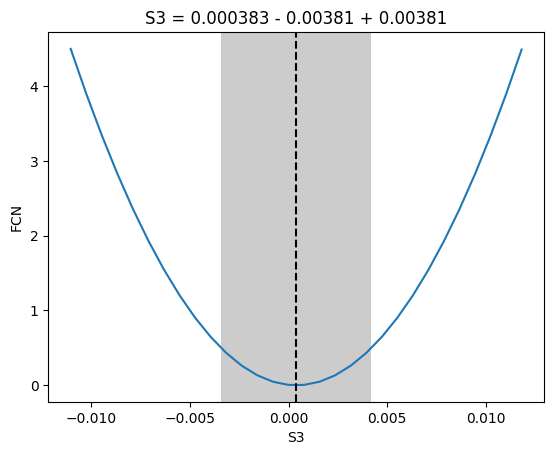

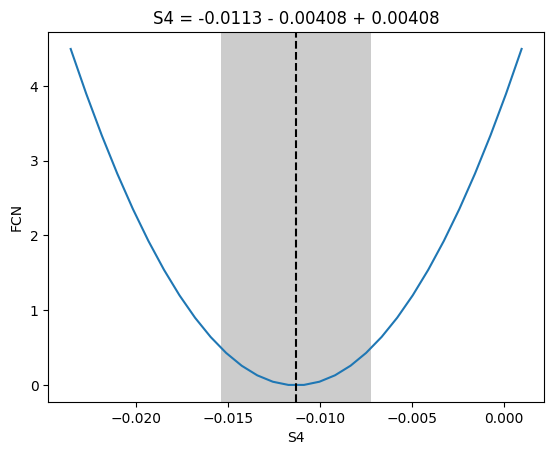

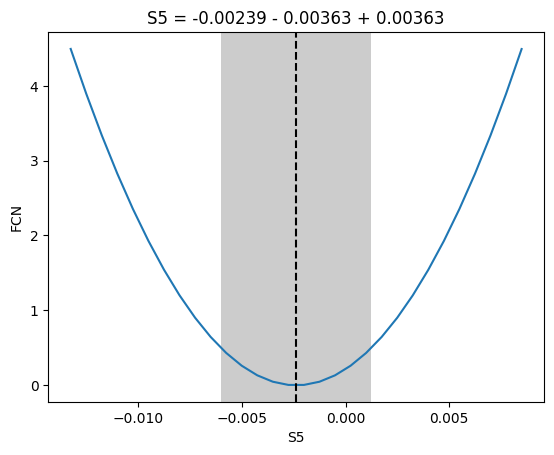

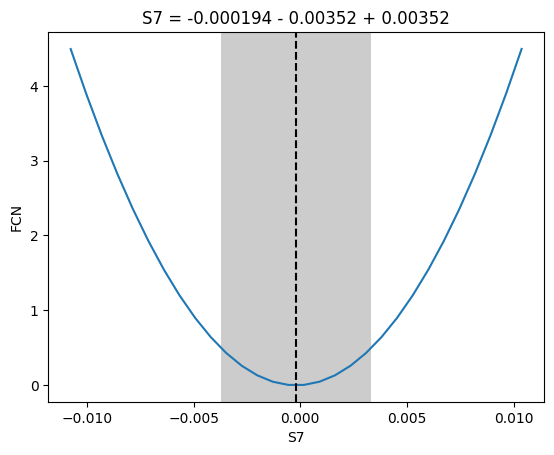

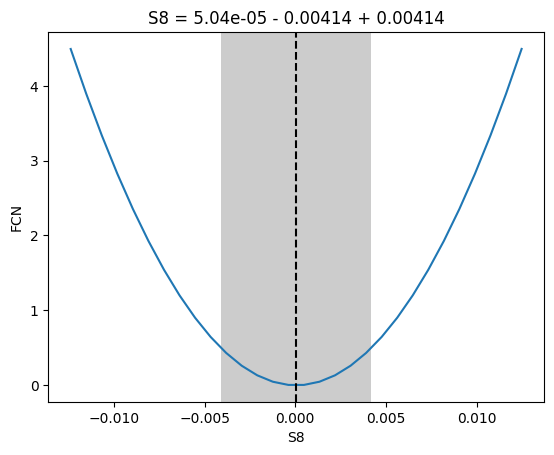

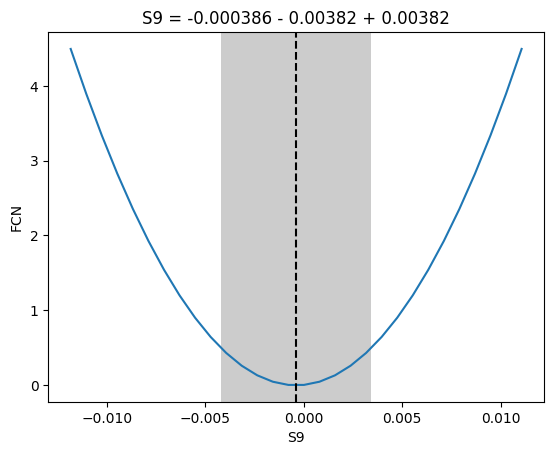

Bin 2: 0.254 pm 0.003, -0.001 pm 0.003, 0.0 pm 0.004, -0.011 pm 0.004, -0.002 pm 0.004, -0.0 pm 0.004, 0.0 pm 0.004, -0.0 pm 0.004, Fuction minimum considered valid: True


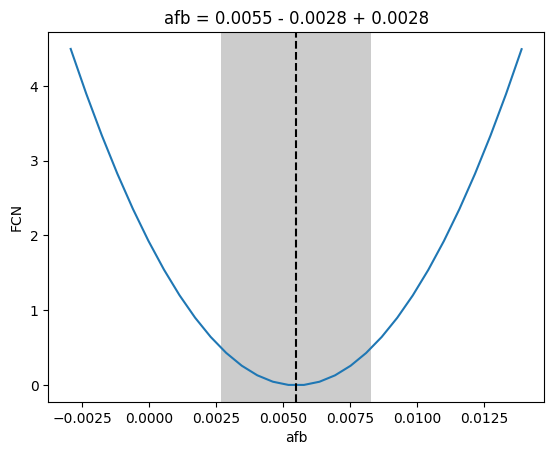

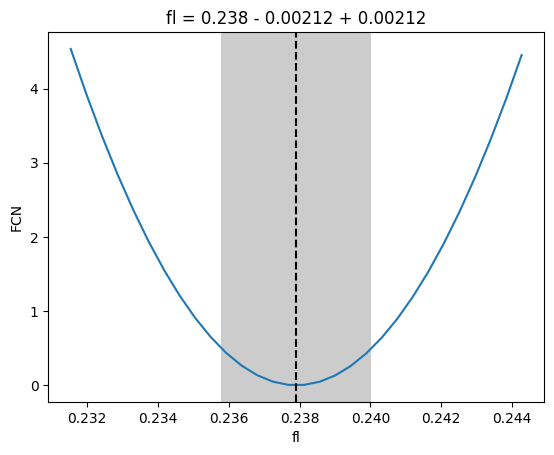

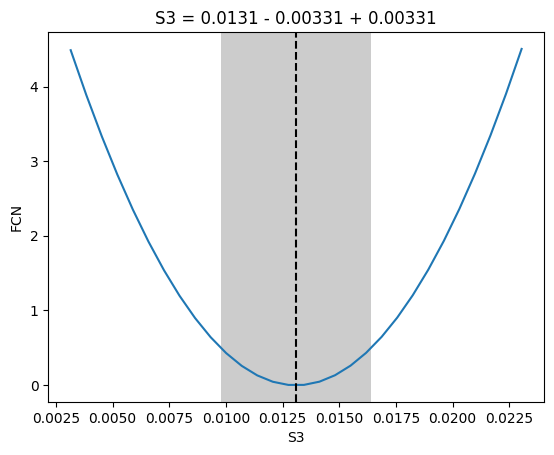

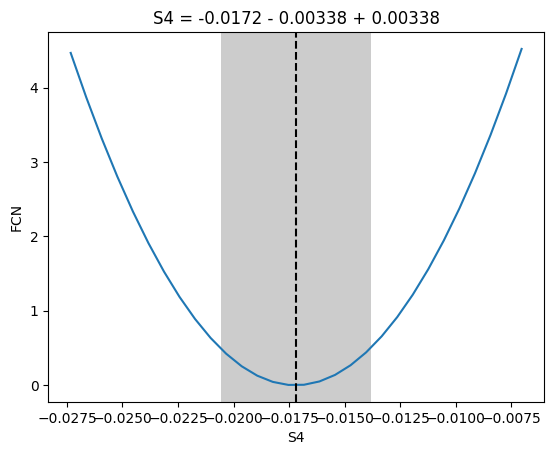

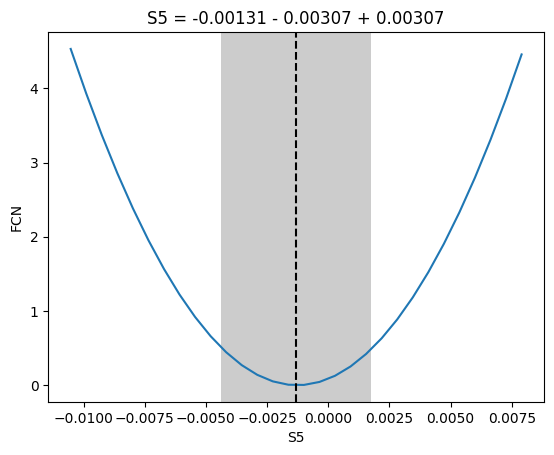

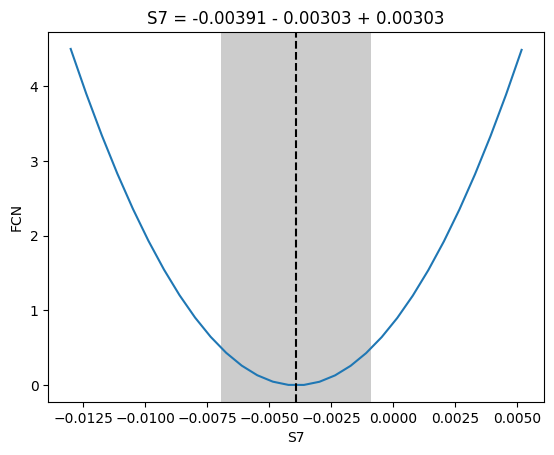

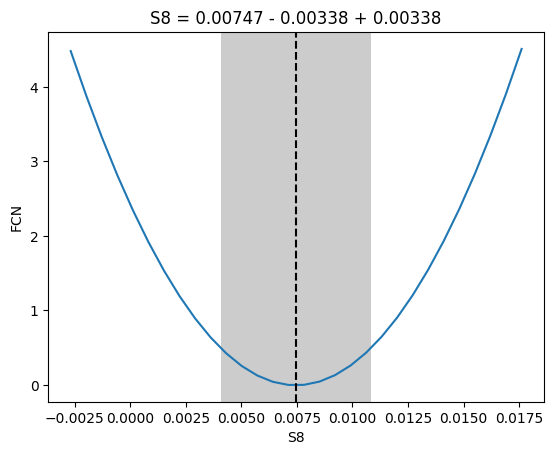

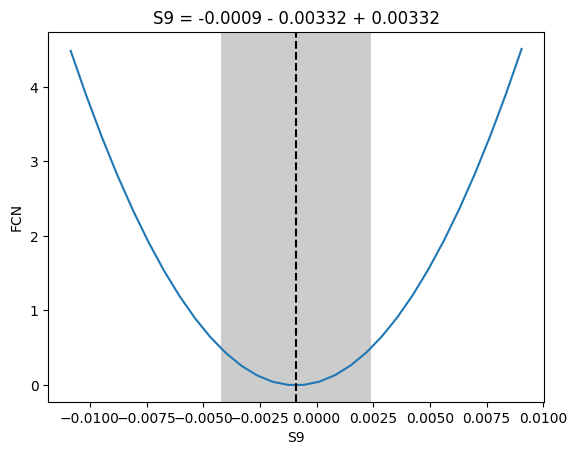

Bin 3: 0.238 pm 0.002, 0.005 pm 0.003, 0.013 pm 0.003, -0.017 pm 0.003, -0.001 pm 0.003, -0.004 pm 0.003, 0.007 pm 0.003, -0.001 pm 0.003, Fuction minimum considered valid: True


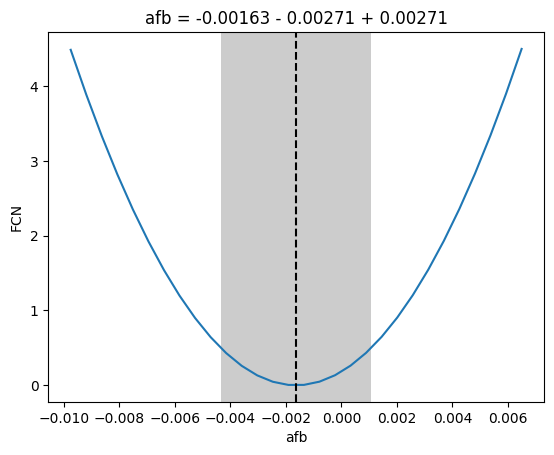

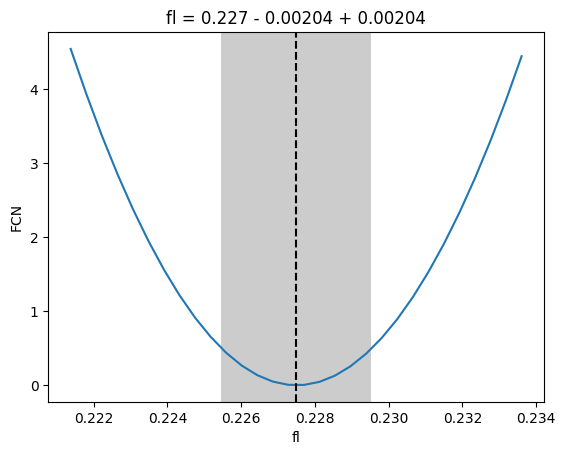

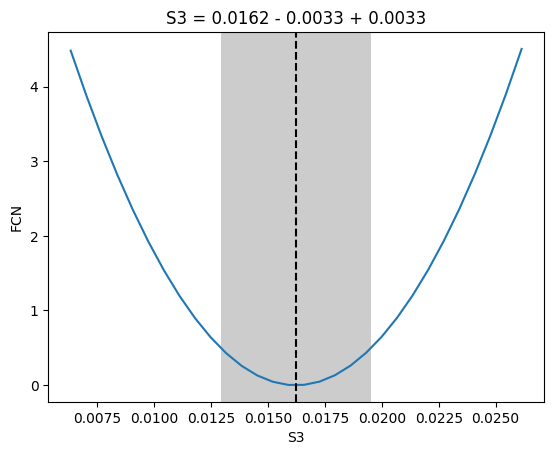

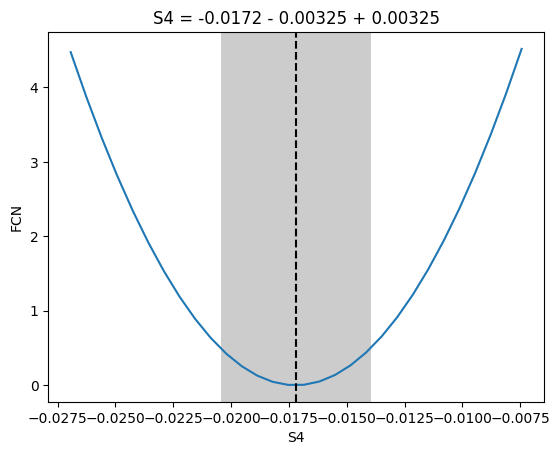

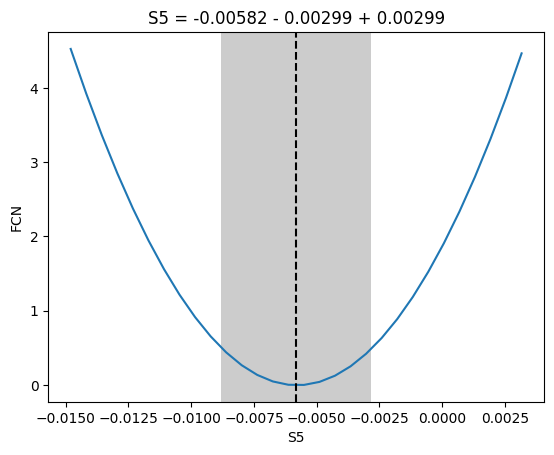

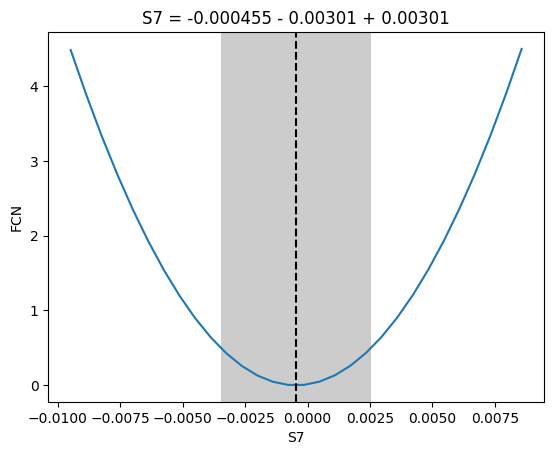

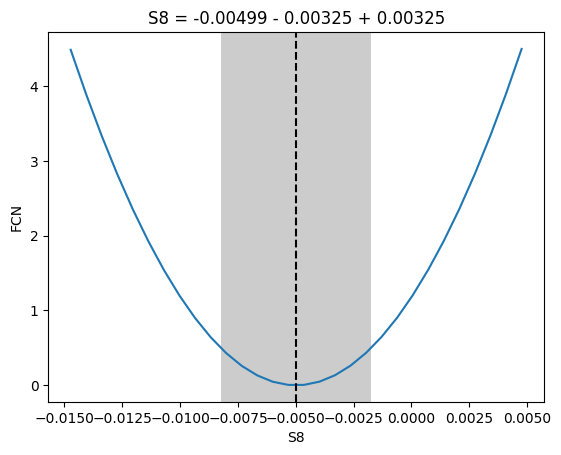

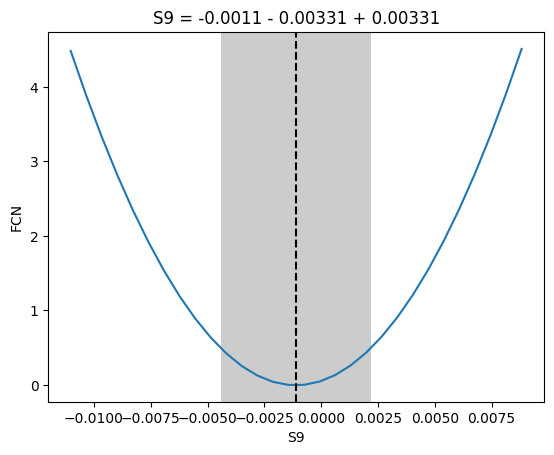

Bin 4: 0.227 pm 0.002, -0.002 pm 0.003, 0.016 pm 0.003, -0.017 pm 0.003, -0.006 pm 0.003, -0.0 pm 0.003, -0.005 pm 0.003, -0.001 pm 0.003, Fuction minimum considered valid: True


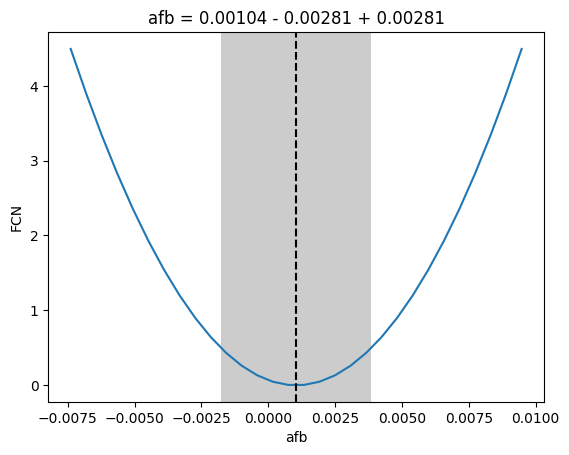

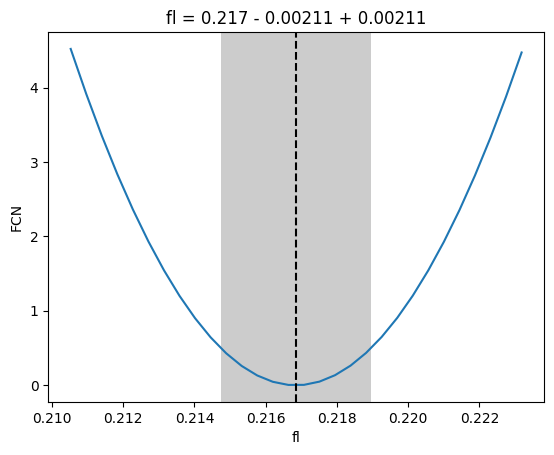

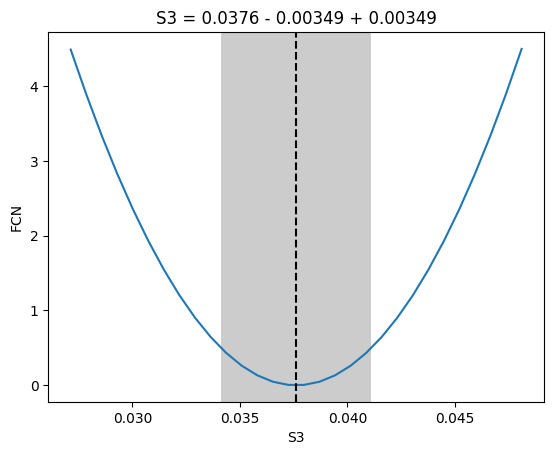

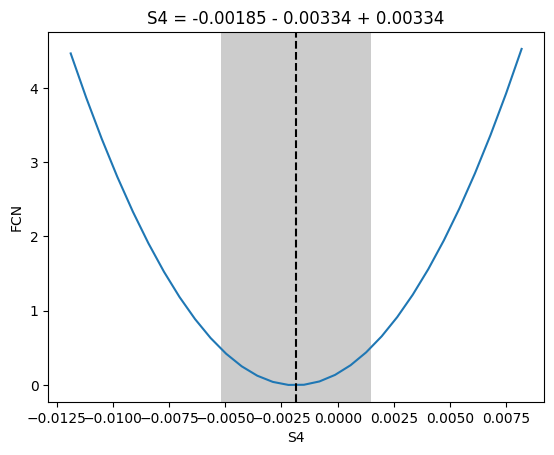

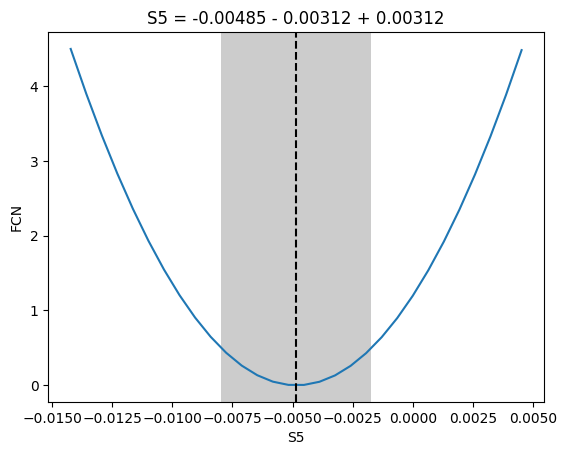

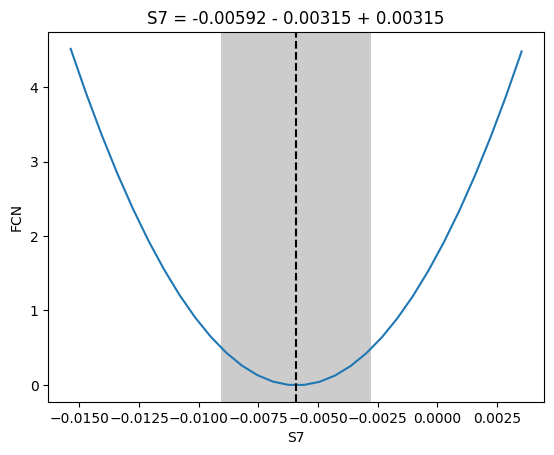

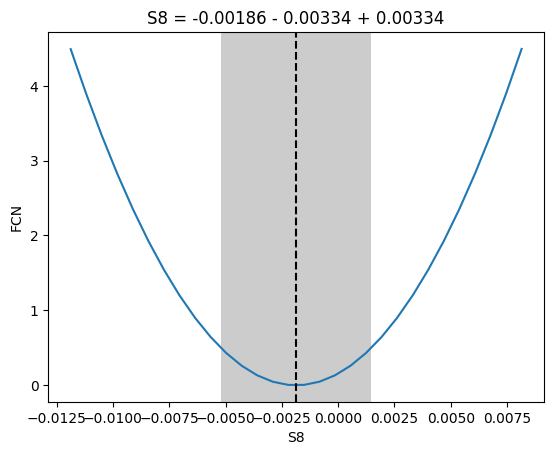

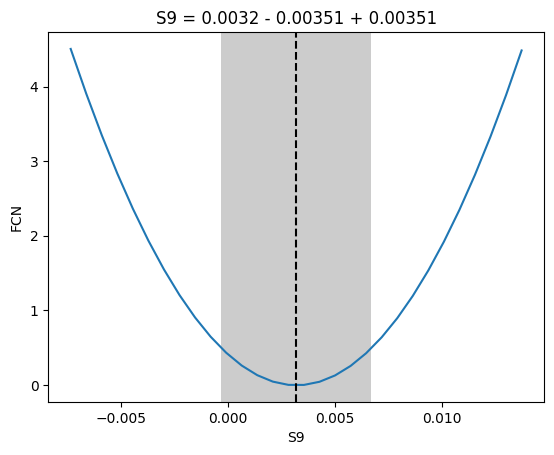

Bin 5: 0.217 pm 0.002, 0.001 pm 0.003, 0.038 pm 0.003, -0.002 pm 0.003, -0.005 pm 0.003, -0.006 pm 0.003, -0.002 pm 0.003, 0.003 pm 0.004, Fuction minimum considered valid: True


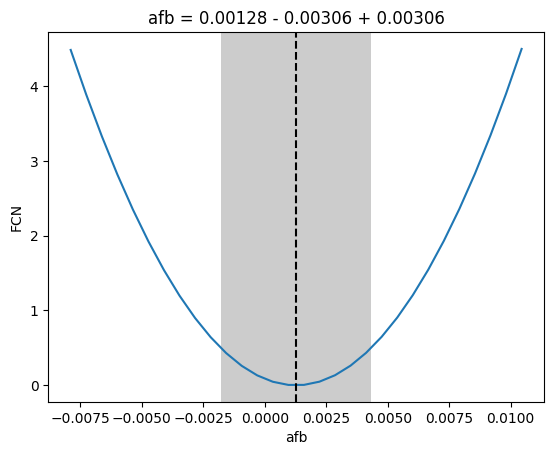

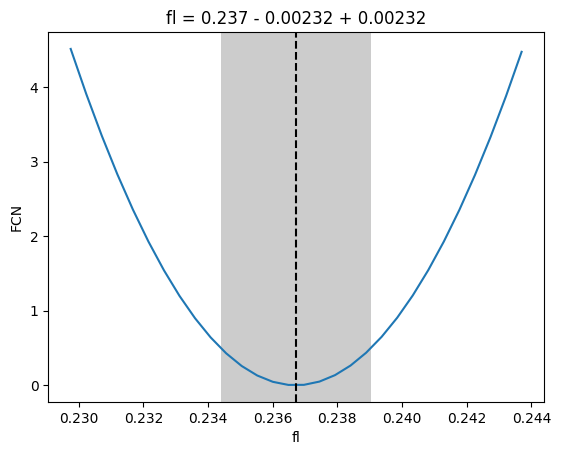

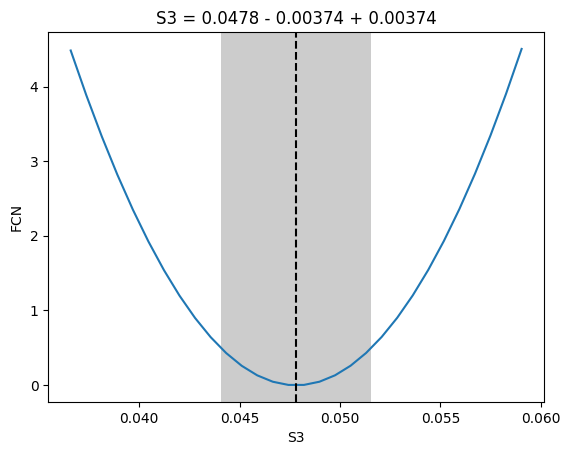

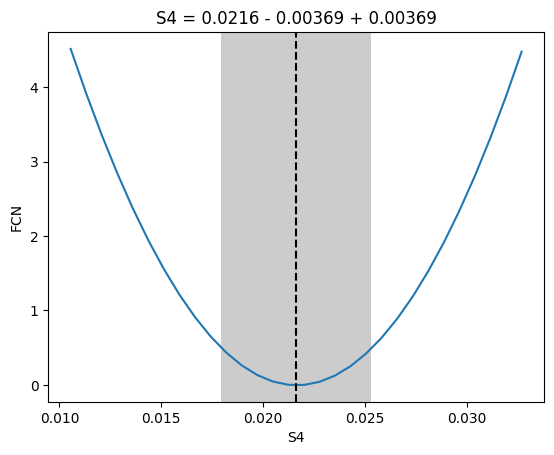

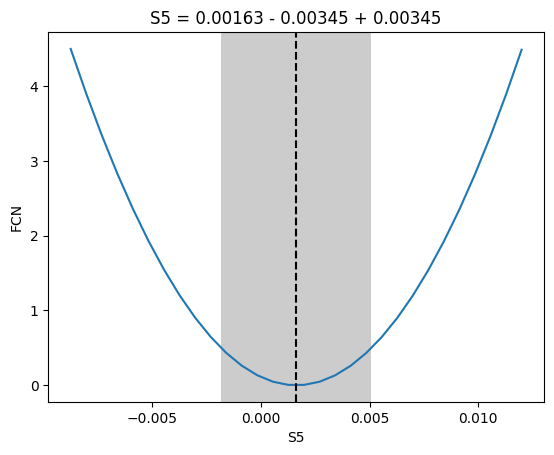

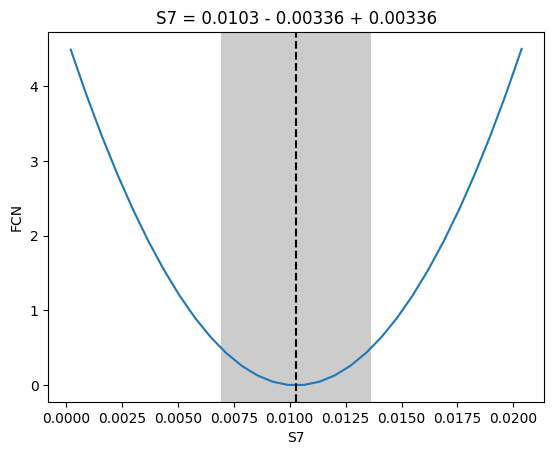

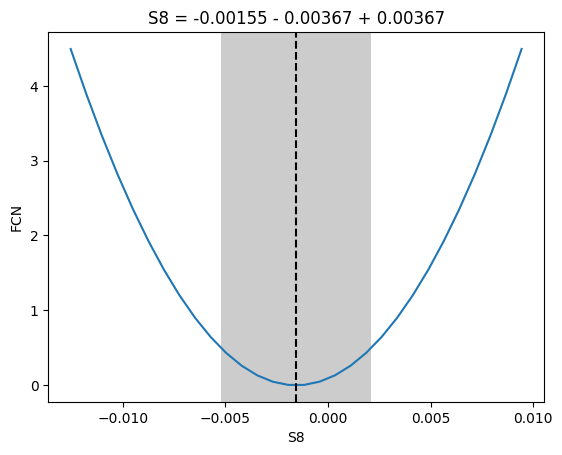

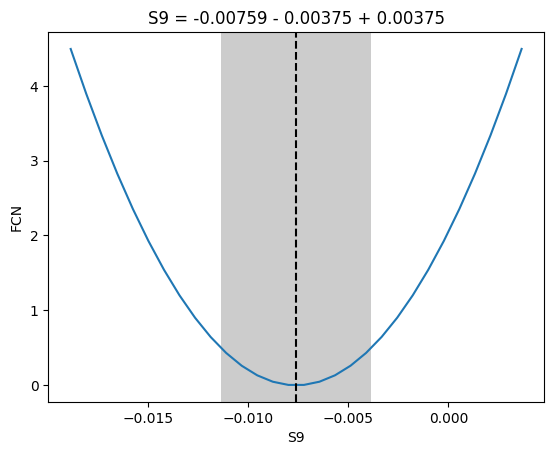

Bin 6: 0.237 pm 0.002, 0.001 pm 0.003, 0.048 pm 0.004, 0.022 pm 0.004, 0.002 pm 0.003, 0.01 pm 0.003, -0.002 pm 0.004, -0.008 pm 0.004, Fuction minimum considered valid: True


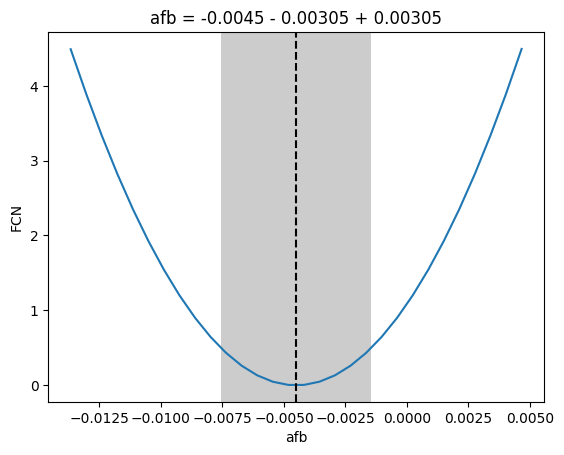

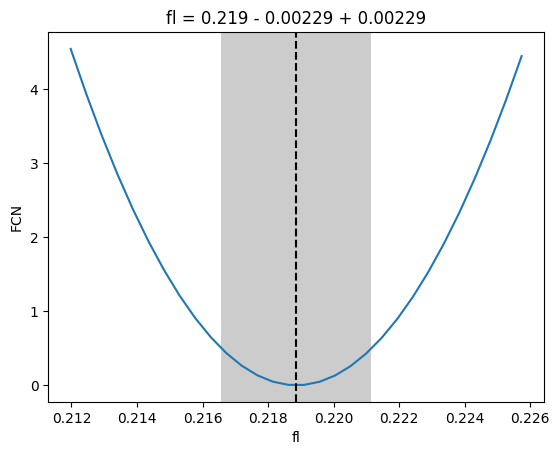

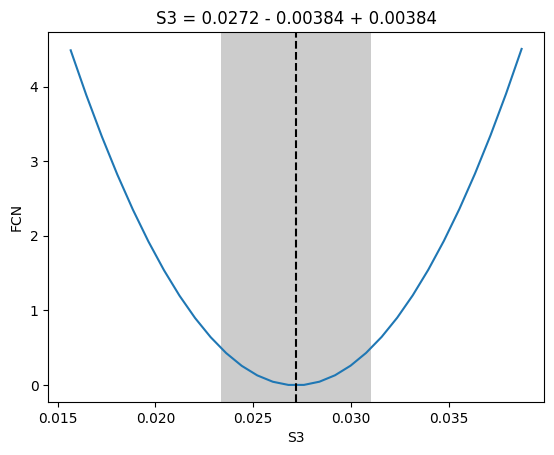

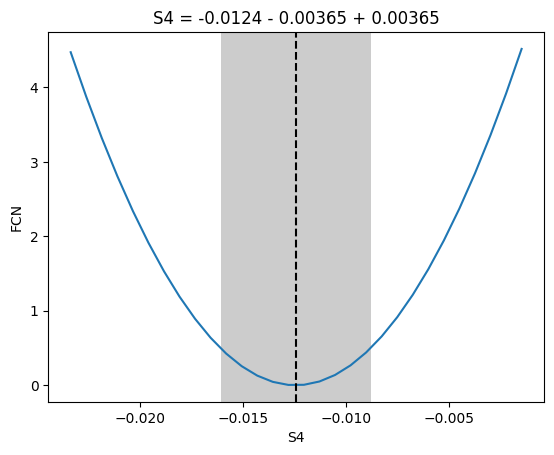

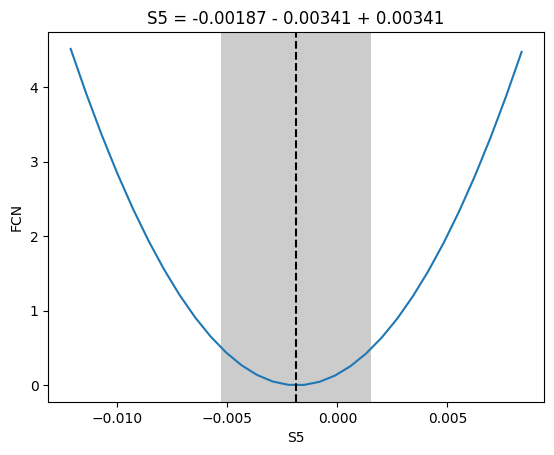

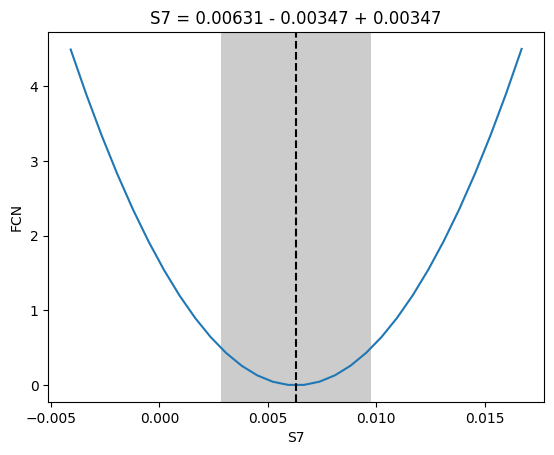

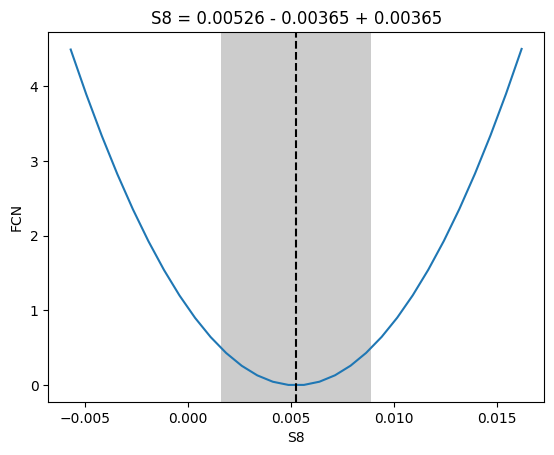

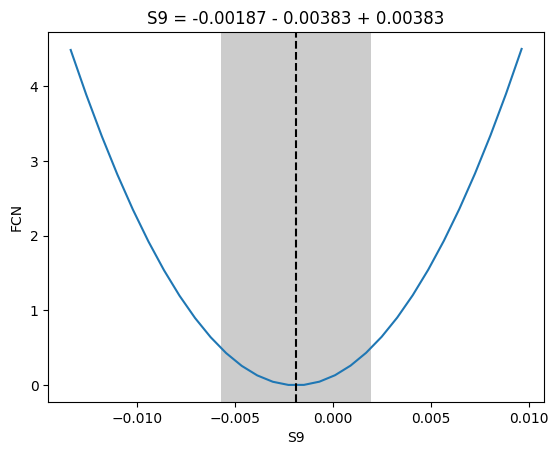

Bin 7: 0.219 pm 0.002, -0.005 pm 0.003, 0.027 pm 0.004, -0.012 pm 0.004, -0.002 pm 0.003, 0.006 pm 0.003, 0.005 pm 0.004, -0.002 pm 0.004, Fuction minimum considered valid: True


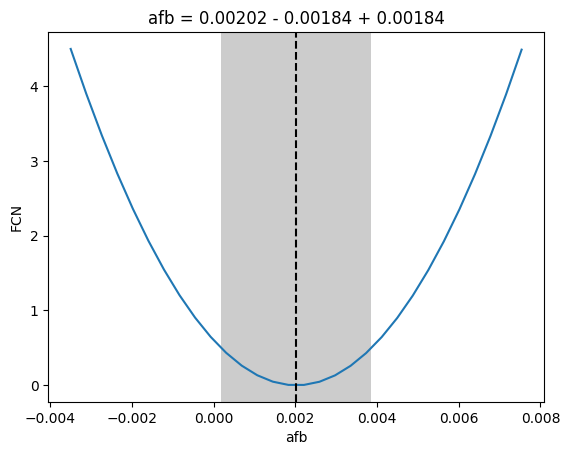

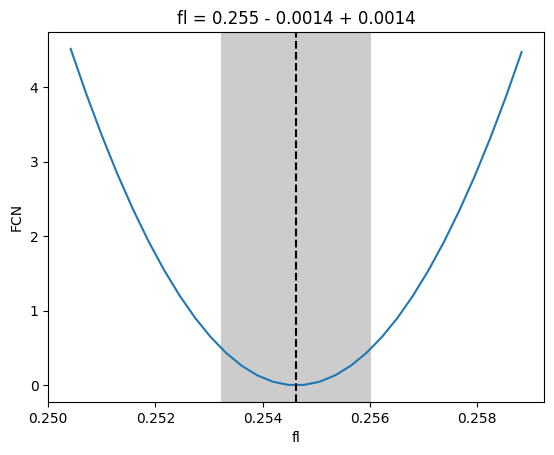

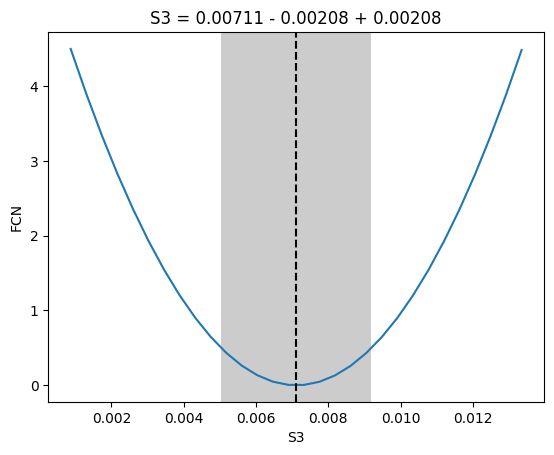

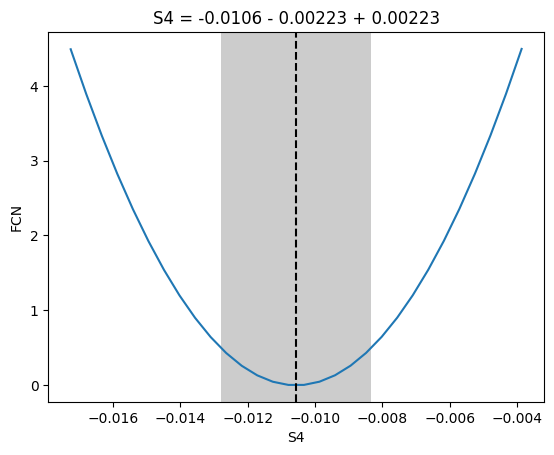

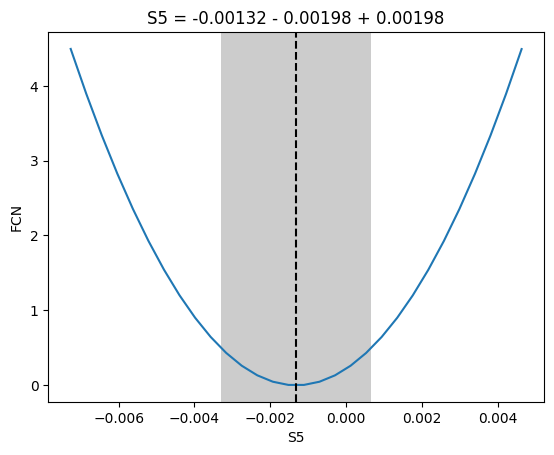

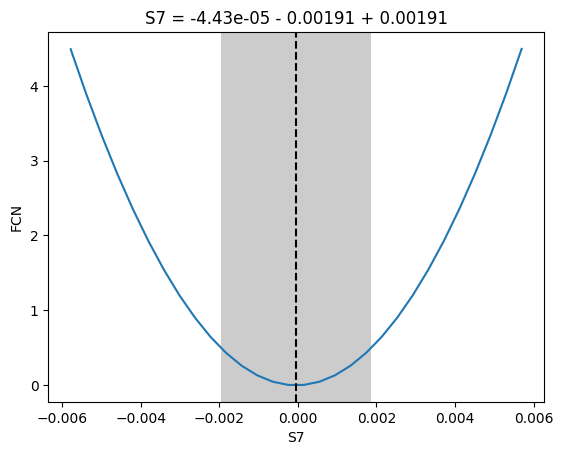

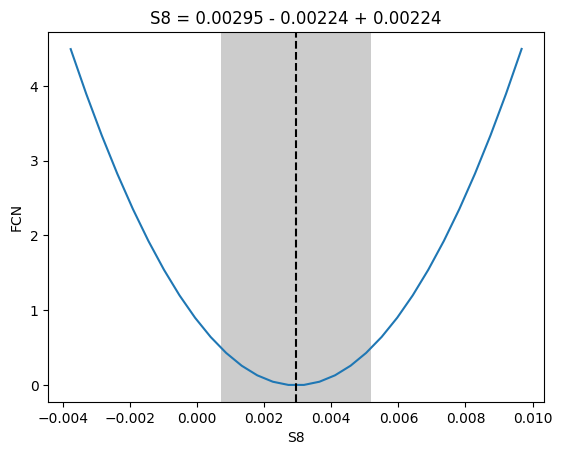

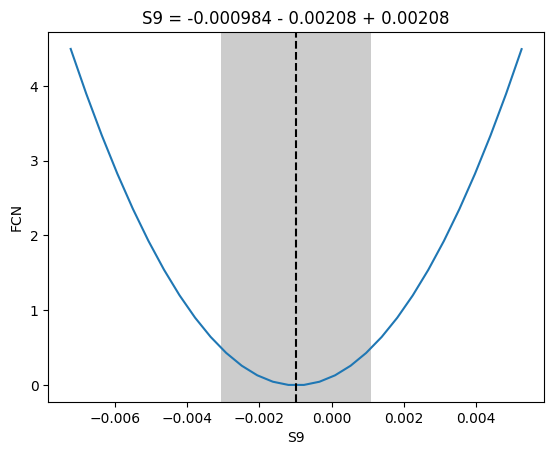

Bin 8: 0.255 pm 0.001, 0.002 pm 0.002, 0.007 pm 0.002, -0.011 pm 0.002, -0.001 pm 0.002, -0.0 pm 0.002, 0.003 pm 0.002, -0.001 pm 0.002, Fuction minimum considered valid: True


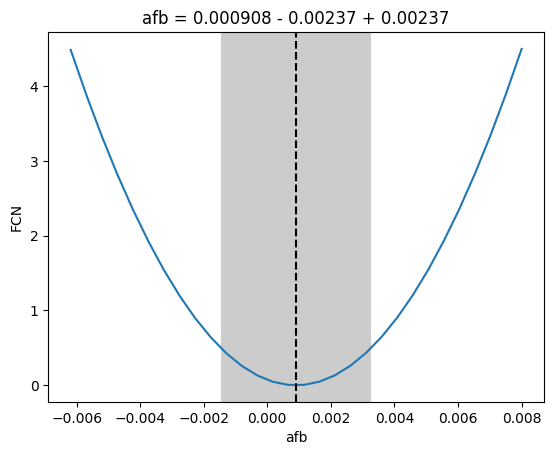

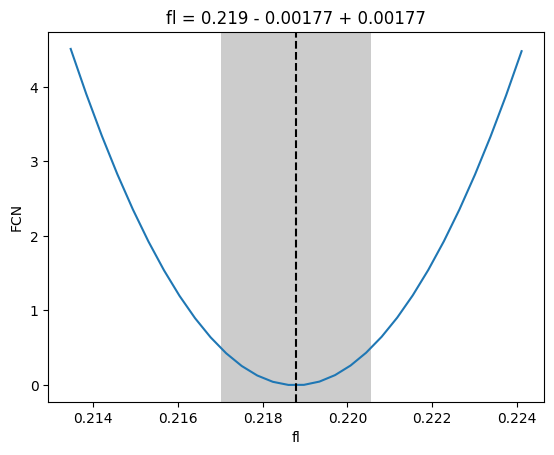

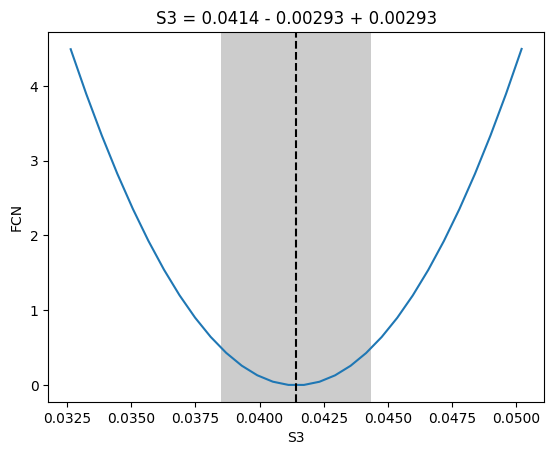

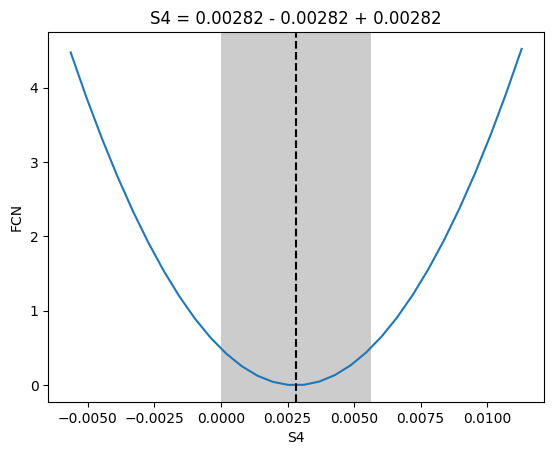

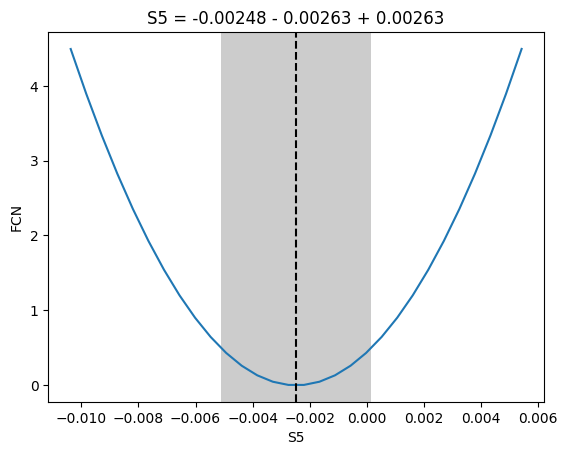

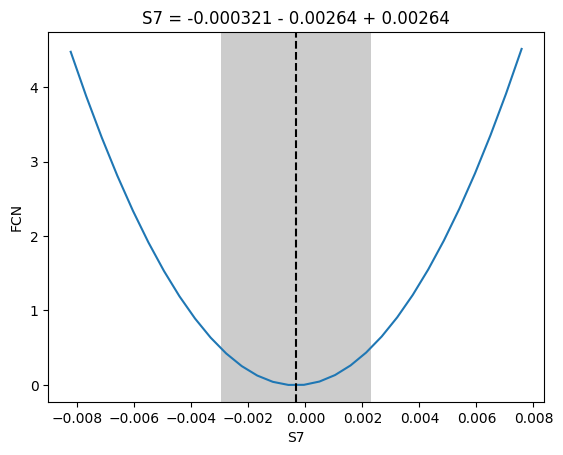

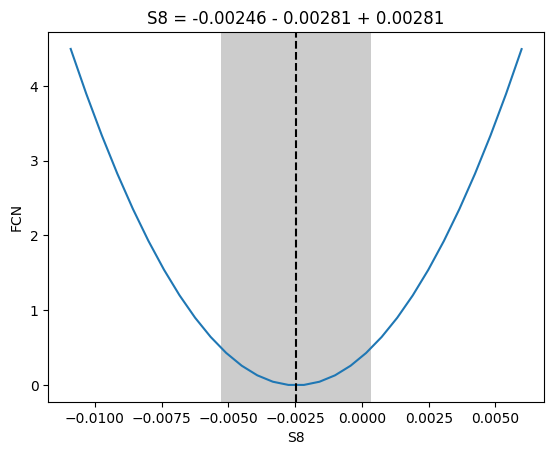

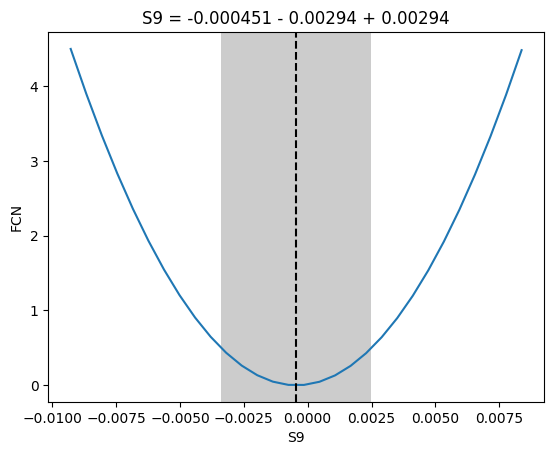

Bin 9: 0.219 pm 0.002, 0.001 pm 0.002, 0.041 pm 0.003, 0.003 pm 0.003, -0.002 pm 0.003, -0.0 pm 0.003, -0.002 pm 0.003, -0.0 pm 0.003, Fuction minimum considered valid: True


In [30]:
bin_number_to_check = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # bin that we want to check in more details in the next cell
bin_results_to_check = None

log_likelihood.errordef = Minuit.LIKELIHOOD
decimal_places = 3
starting_point = [0.1,-0.1]
fls, fl_errs = [], []
afbs, afb_errs = [], []
S3,S3_errs = [], []
S4,S4_errs = [], []
S5,S5_errs = [], []
S7,S7_errs = [], []
S8,S8_errs = [], []
S9,S9_errs = [], []
for i in range(len(bins)):
    m = Minuit(log_likelihood, fl=starting_point[0], afb=starting_point[1], S3=starting_point[1], S4=starting_point[1], S5=starting_point[1], S7=starting_point[1], S8=starting_point[1], S9=starting_point[1], _bin = i)
    m.fixed['_bin'] = True  # fixing the bin number as we don't want to optimize it
    m.limits=((-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0), None)
    m.migrad()
    m.hesse()
    if i == bin_number_to_check[i]:
        bin_results_to_check = m
        bin_results_to_check.draw_mnprofile('afb', bound=3)
        plt.show()
        bin_results_to_check.draw_mnprofile('fl', bound=3)
        plt.show()
        bin_results_to_check.draw_mnprofile('S3', bound=3)
        plt.show()
        bin_results_to_check.draw_mnprofile('S4', bound=3)
        plt.show()
        bin_results_to_check.draw_mnprofile('S5', bound=3)
        plt.show()
        bin_results_to_check.draw_mnprofile('S7', bound=3)
        plt.show()
        bin_results_to_check.draw_mnprofile('S8', bound=3)
        plt.show()
        bin_results_to_check.draw_mnprofile('S9', bound=3)
        plt.show()
    fls.append(m.values[0])
    afbs.append(m.values[1])
    S3.append(m.values[2])
    S4.append(m.values[3])
    S5.append(m.values[4])
    S7.append(m.values[5])
    S8.append(m.values[6])
    S9.append(m.values[7])
    fl_errs.append(m.errors[0])
    afb_errs.append(m.errors[1])
    S3_errs.append(m.errors[2])
    S4_errs.append(m.errors[3])
    S5_errs.append(m.errors[4])
    S7_errs.append(m.errors[5])
    S8_errs.append(m.errors[6])
    S9_errs.append(m.errors[7])
    print(f"Bin {i}: {np.round(fls[i], decimal_places)} pm {np.round(fl_errs[i], decimal_places)},", 
          f"{np.round(afbs[i], decimal_places)} pm {np.round(afb_errs[i], decimal_places)},",
          f"{np.round(S3[i], decimal_places)} pm {np.round(S3_errs[i], decimal_places)},",
          f"{np.round(S4[i], decimal_places)} pm {np.round(S4_errs[i], decimal_places)},",
          f"{np.round(S5[i], decimal_places)} pm {np.round(S5_errs[i], decimal_places)},",
          f"{np.round(S7[i], decimal_places)} pm {np.round(S7_errs[i], decimal_places)},",
          f"{np.round(S8[i], decimal_places)} pm {np.round(S8_errs[i], decimal_places)},",
          f"{np.round(S9[i], decimal_places)} pm {np.round(S9_errs[i], decimal_places)},",
          f"Fuction minimum considered valid: {m.fmin.is_valid}")

In [ ]:
bin_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
number_of_bins_in_hist = 25
for i in range(len(bin_to_plot)):
    cos_theta_l_bin = bins[bin_to_plot[i]]['costhetal']
    hist, _bins, _ = plt.hist(cos_theta_l_bin, bins=number_of_bins_in_hist)
    x = np.linspace(-1, 1, number_of_bins_in_hist)
    pdf_multiplier = np.sum(hist) * (np.max(cos_theta_l_bin) - np.min(cos_theta_l_bin)) / number_of_bins_in_hist
    y = d2gamma_p_d2q2_dcostheta(fl=fls[bin_to_plot[i]], afb=afbs[bin_to_plot[i]], cos_theta_l=x) * pdf_multiplier
    plt.plot(x, y, label=f'Fit for bin {bin_to_plot[i]}')
    plt.xlabel(r'$cos(\theta_l)$')
    plt.ylabel(r'Number of candidates')
    plt.legend()
    plt.grid()
    plt.show()

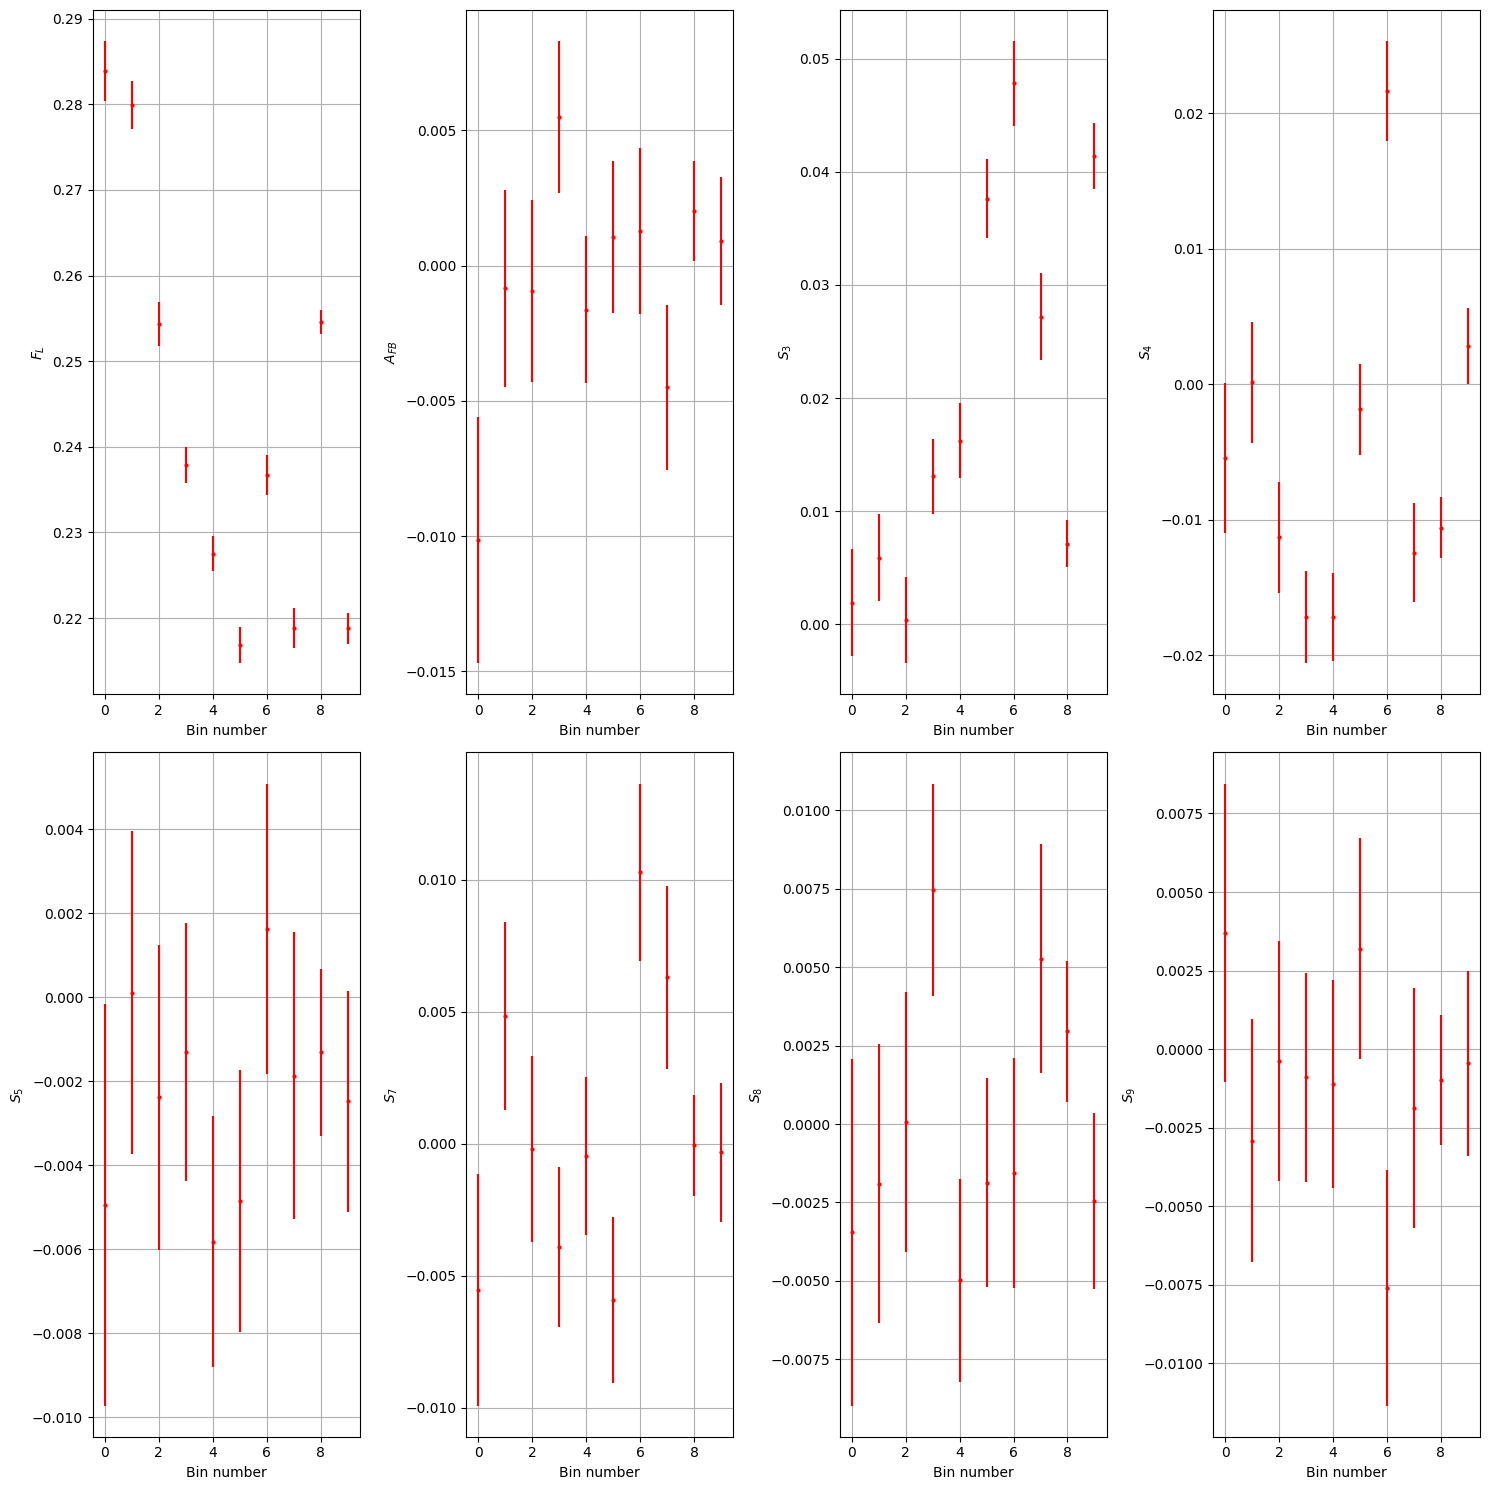

In [31]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(15, 15))
ax1.errorbar(np.linspace(0, len(bins) - 1, len(bins)), fls, yerr=fl_errs, fmt='o', markersize=2, label=r'$F_L$', color='red')
ax1.grid()
ax1.set_ylabel(r'$F_L$')
ax1.set_xlabel(r'Bin number')
ax2.errorbar(np.linspace(0, len(bins) - 1, len(bins)), afbs, yerr=afb_errs, fmt='o', markersize=2, label=r'$A_{FB}$', color='red')
ax2.grid()
ax2.set_ylabel(r'$A_{FB}$')
ax2.set_xlabel(r'Bin number')
ax3.errorbar(np.linspace(0, len(bins) - 1, len(bins)), S3, yerr=S3_errs, fmt='o', markersize=2, label=r'$S_{3}$', color='red')
ax3.grid()
ax3.set_ylabel(r'$S_{3}$')
ax3.set_xlabel(r'Bin number')
ax4.errorbar(np.linspace(0, len(bins) - 1, len(bins)), S4, yerr=S4_errs, fmt='o', markersize=2, label=r'$S_{4}$', color='red')
ax4.grid()
ax4.set_ylabel(r'$S_{4}$')
ax4.set_xlabel(r'Bin number')
ax5.errorbar(np.linspace(0, len(bins) - 1, len(bins)), S5, yerr=S5_errs, fmt='o', markersize=2, label=r'$S_{5}$', color='red')
ax5.grid()
ax5.set_ylabel(r'$S_{5}$')
ax5.set_xlabel(r'Bin number')
ax6.errorbar(np.linspace(0, len(bins) - 1, len(bins)), S7, yerr=S7_errs, fmt='o', markersize=2, label=r'$S_{7}$', color='red')
ax6.grid()
ax6.set_ylabel(r'$S_{7}$')
ax6.set_xlabel(r'Bin number')
ax7.errorbar(np.linspace(0, len(bins) - 1, len(bins)), S8, yerr=S8_errs, fmt='o', markersize=2, label=r'$S_{8}$', color='red')
ax7.grid()
ax7.set_ylabel(r'$S_{8}$')
ax7.set_xlabel(r'Bin number')
ax8.errorbar(np.linspace(0, len(bins) - 1, len(bins)), S9, yerr=S9_errs, fmt='o', markersize=2, label=r'$S_{9}$', color='red')
ax8.grid()
ax8.set_ylabel(r'$S_{9}$')
ax8.set_xlabel(r'Bin number')
plt.tight_layout()
plt.show()